---
title: "Plotnine | R에서 비롯한 패키지"
author: "강신성"
date: "2023-10-09"
date-format: iso
categories: [python, plotnine]
---


> ```plotnine``` : R에서의 문법을 이용하여 그래프를 그려보자!

## 1. 라이브러리 import

In [1]:
##!pip install plotnine   ## plotnine이 구축되지 않은 경우 설치해야 한다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [3]:
import plotnine

In [4]:
plotnine.options.dpi= 150
plotnine.options.figure_size = (6, 5)

> 간단한 그래프 설정이다.

## 2. `mpg` data

### **A. read data**
---

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/mpg.csv')
df

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

### **B. descriptions**
---

In [6]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

\- 각 행들이 어떤 의미를 가지는 지 Chat GPT에게 분석을 요청해봤다.

![](https://guebin.github.io/DV2023/posts/03wk-1_files/figure-html/b4416c5a-f094-4b20-8200-a449840334dd-1-d0bca24b-da24-41af-8954-a415135b817c.png)

\- 그렇단다.

## 3. `mpg`의 시각화 : 2차원

### **A. `x=displ`, `y=hwy`**
---
\- 예시 1 : 정직하게 메뉴얼대로...

* 파라미터를 직접 지정해주는 경우

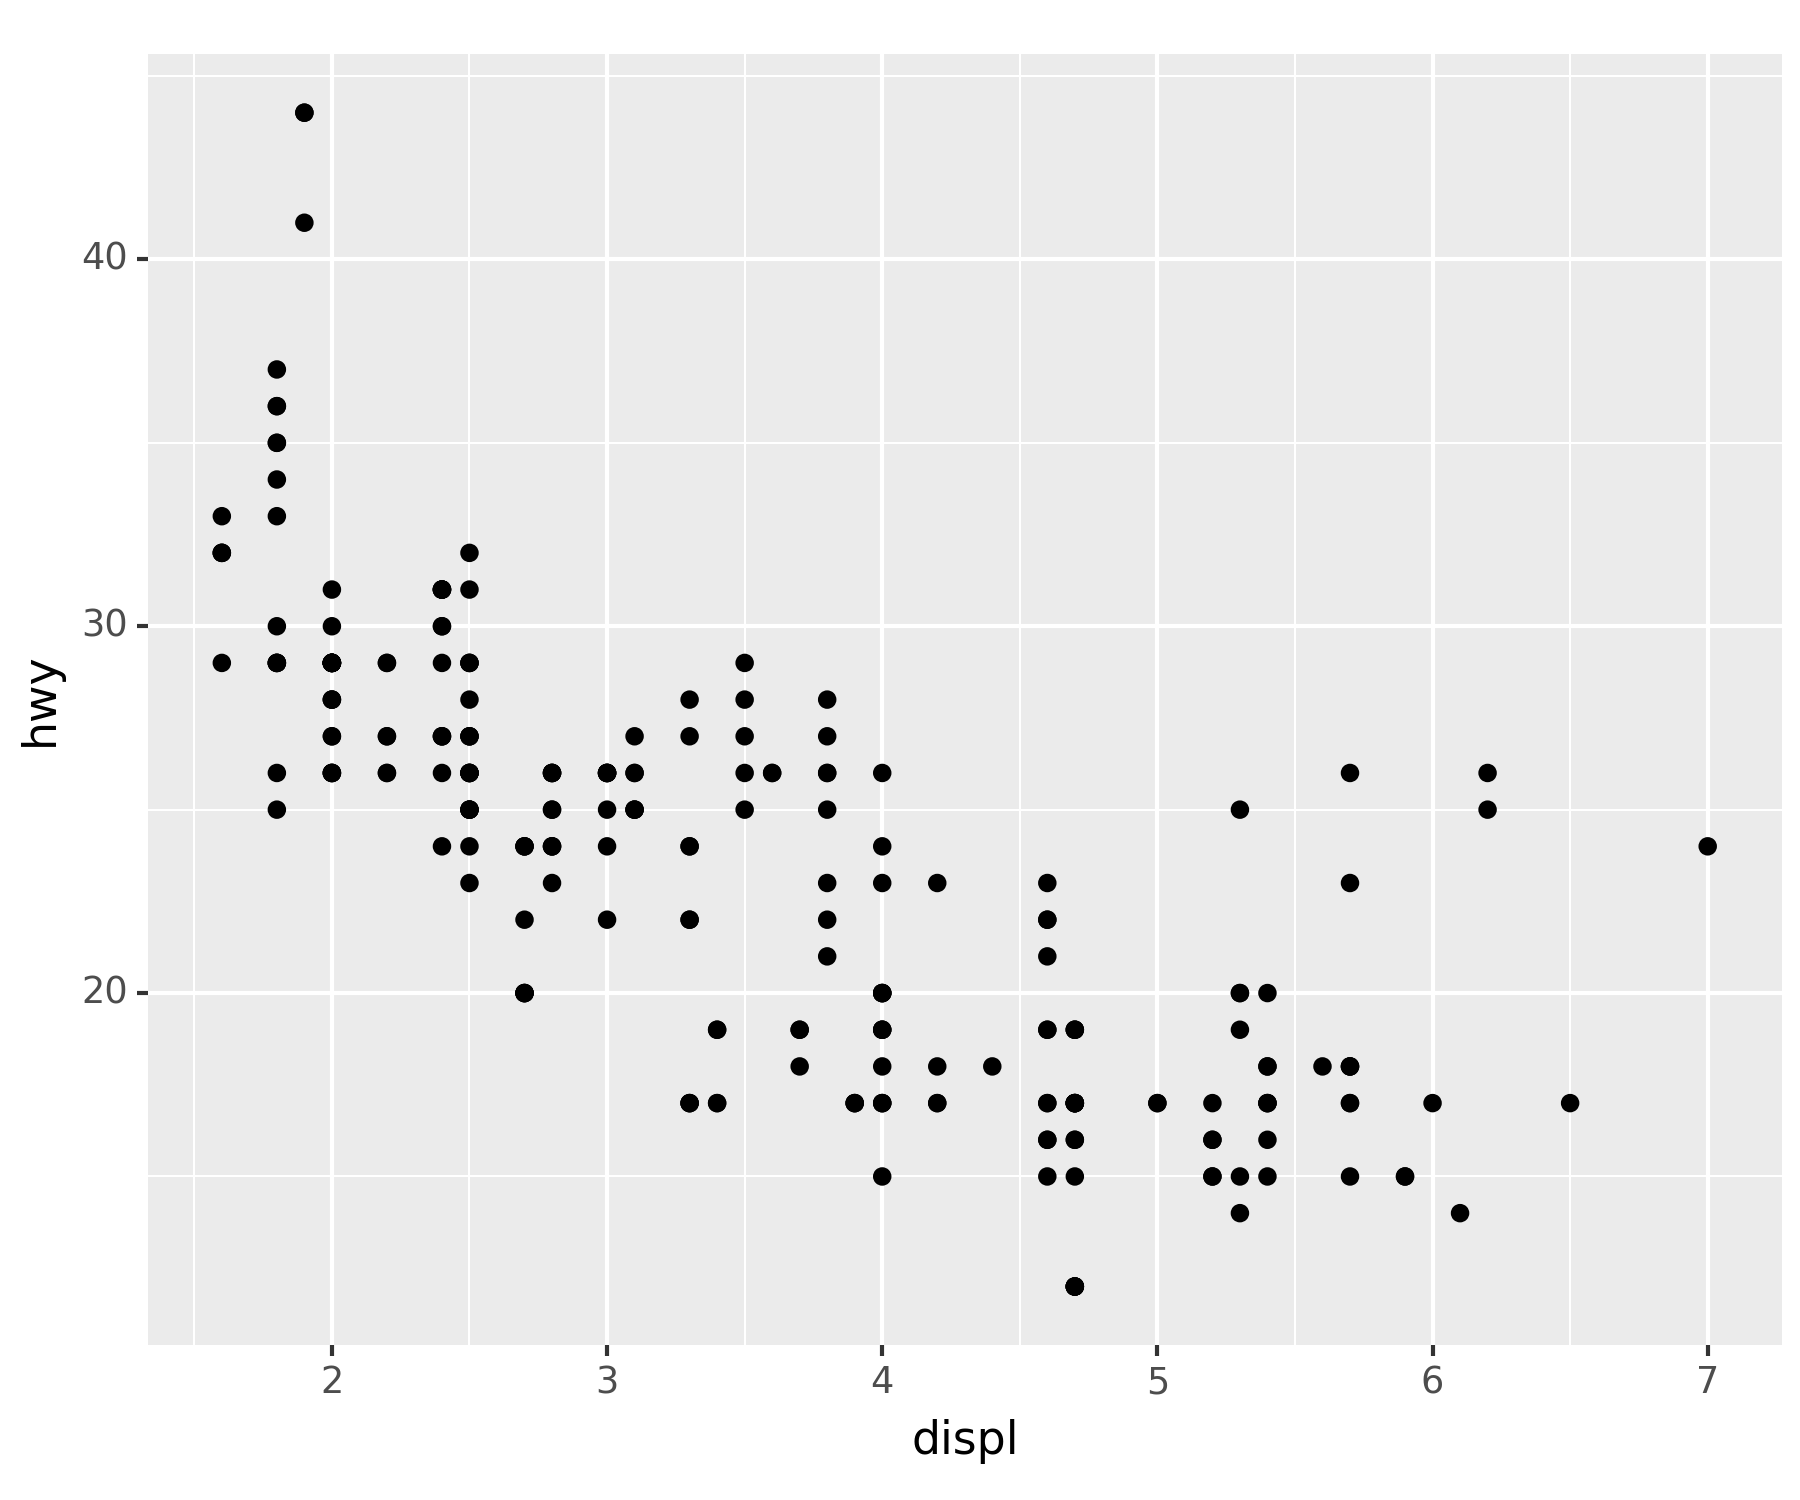

<Figure Size: (900 x 750)>

In [7]:
ggplot(data = df) + geom_point(mapping = aes(x = 'displ', y = 'hwy')) ## aes : dictionary와 유사하다고 생각하면 된다.

* 파라미터 생략

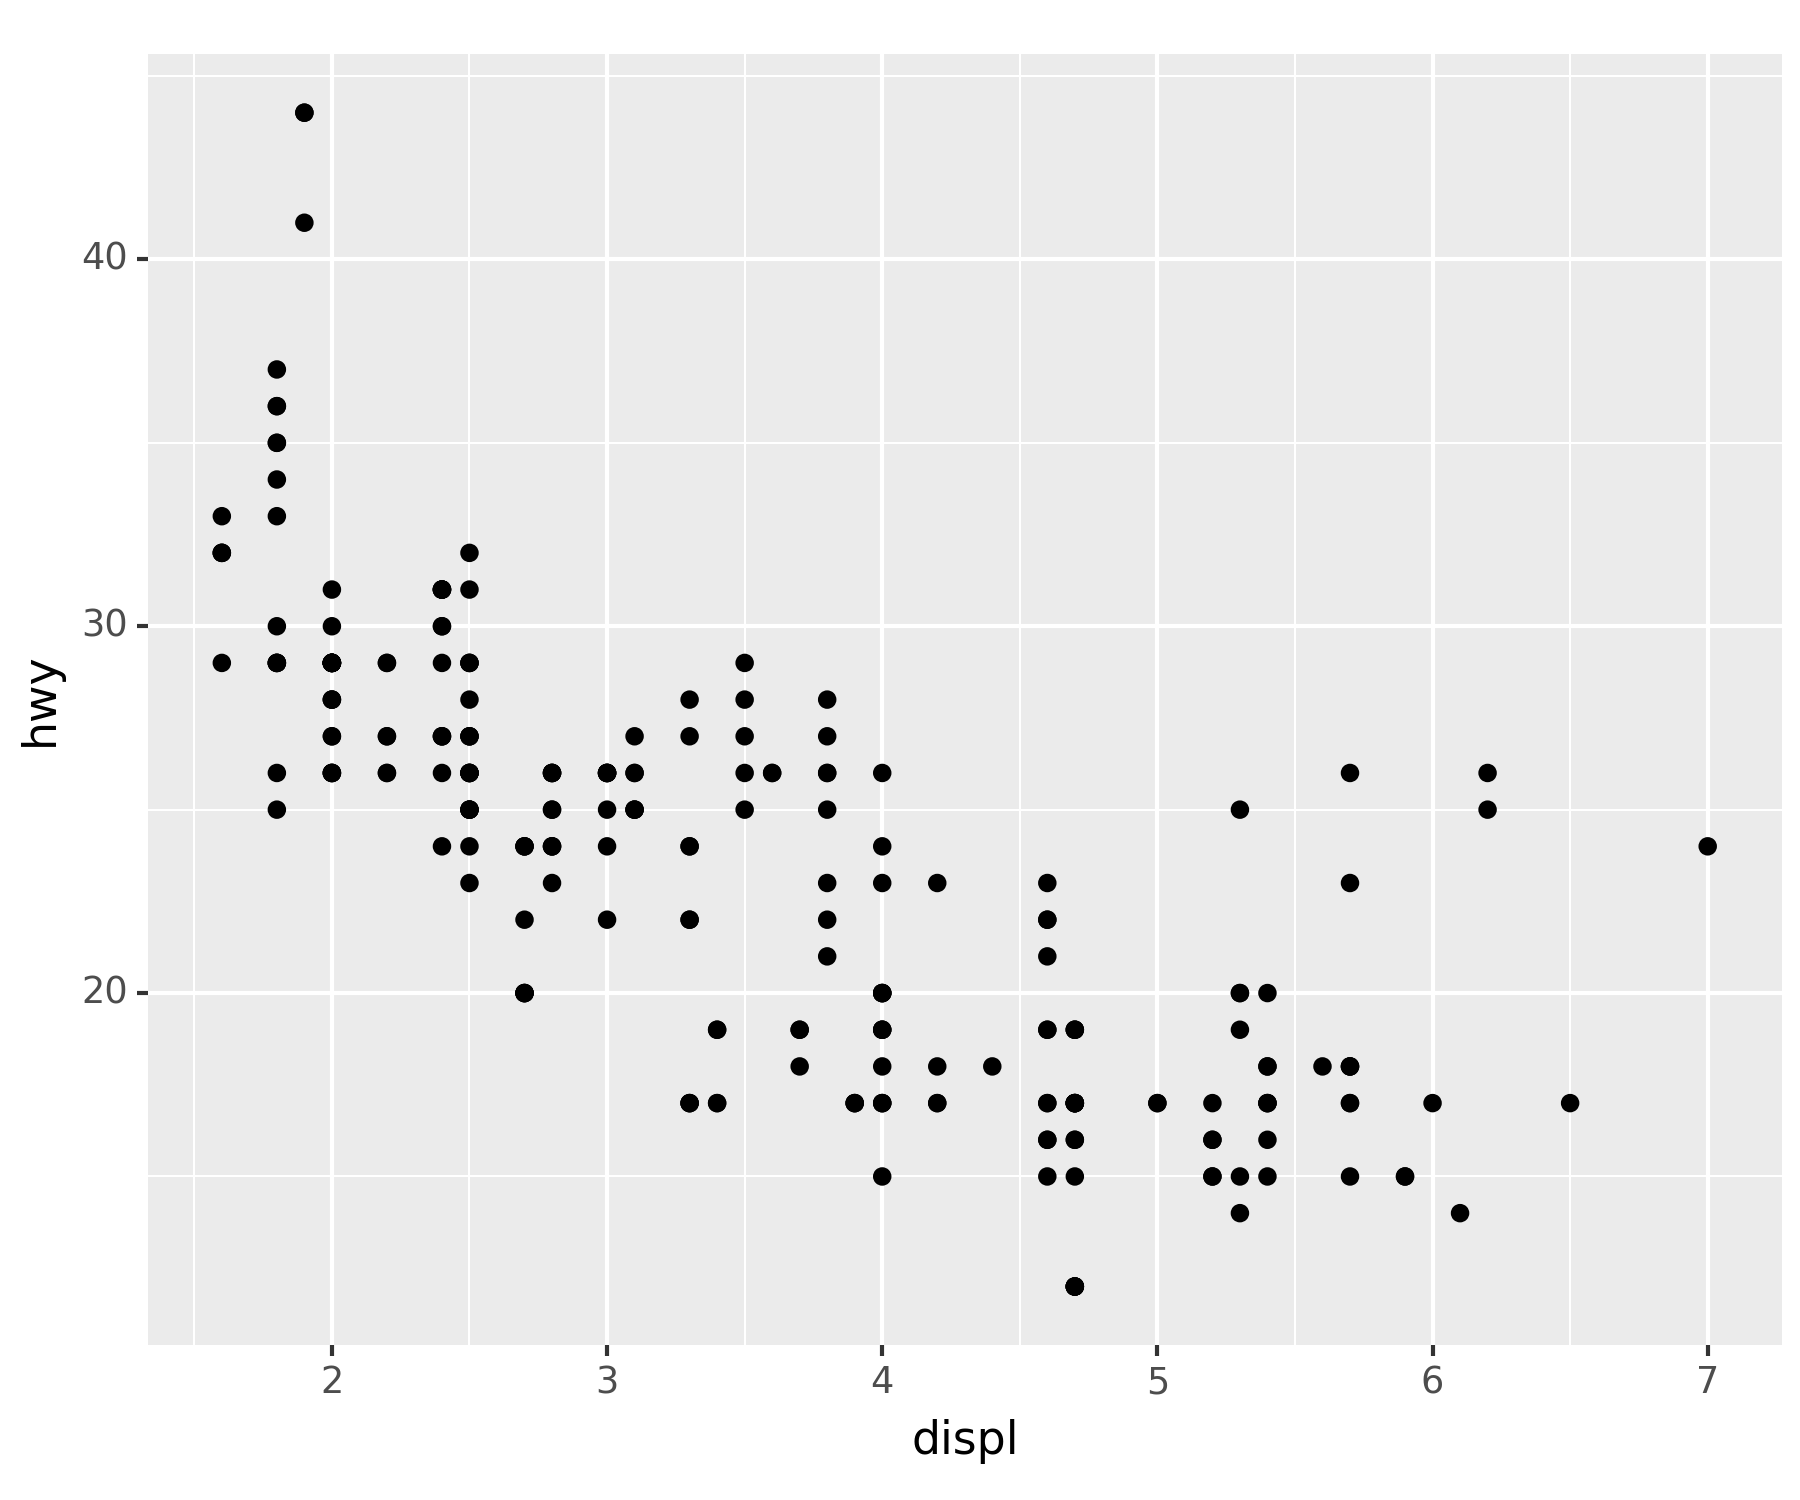

<Figure Size: (900 x 750)>

In [8]:
ggplot(df) + geom_point(aes(x = 'displ', y = 'hwy'))

### **B. `rpy2` : 코랩 아닌 경우 실습 금지**
---
\- R에서도 거의 똑같은 문법으로 그릴 수 있음

In [1]:
#import rpy2
#%load_ext rpy2.ipython

In [2]:
#%%R
#library(tidyverse)
#df = mpg
#ggplot(df)+geom_point(aes(x=displ,y=hwy))

## 4. mpg의 시각화 : 3차원

### **A. `x=displ`, `y=hwy`, `shape=class`**
---

In [9]:
set(df['class'])  ## 중복되지 않은 값이 어느 것이 있는 지 산출
## df['class'].unique() : 이건 array로 산출된다. 동일한 코드

{'2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv'}

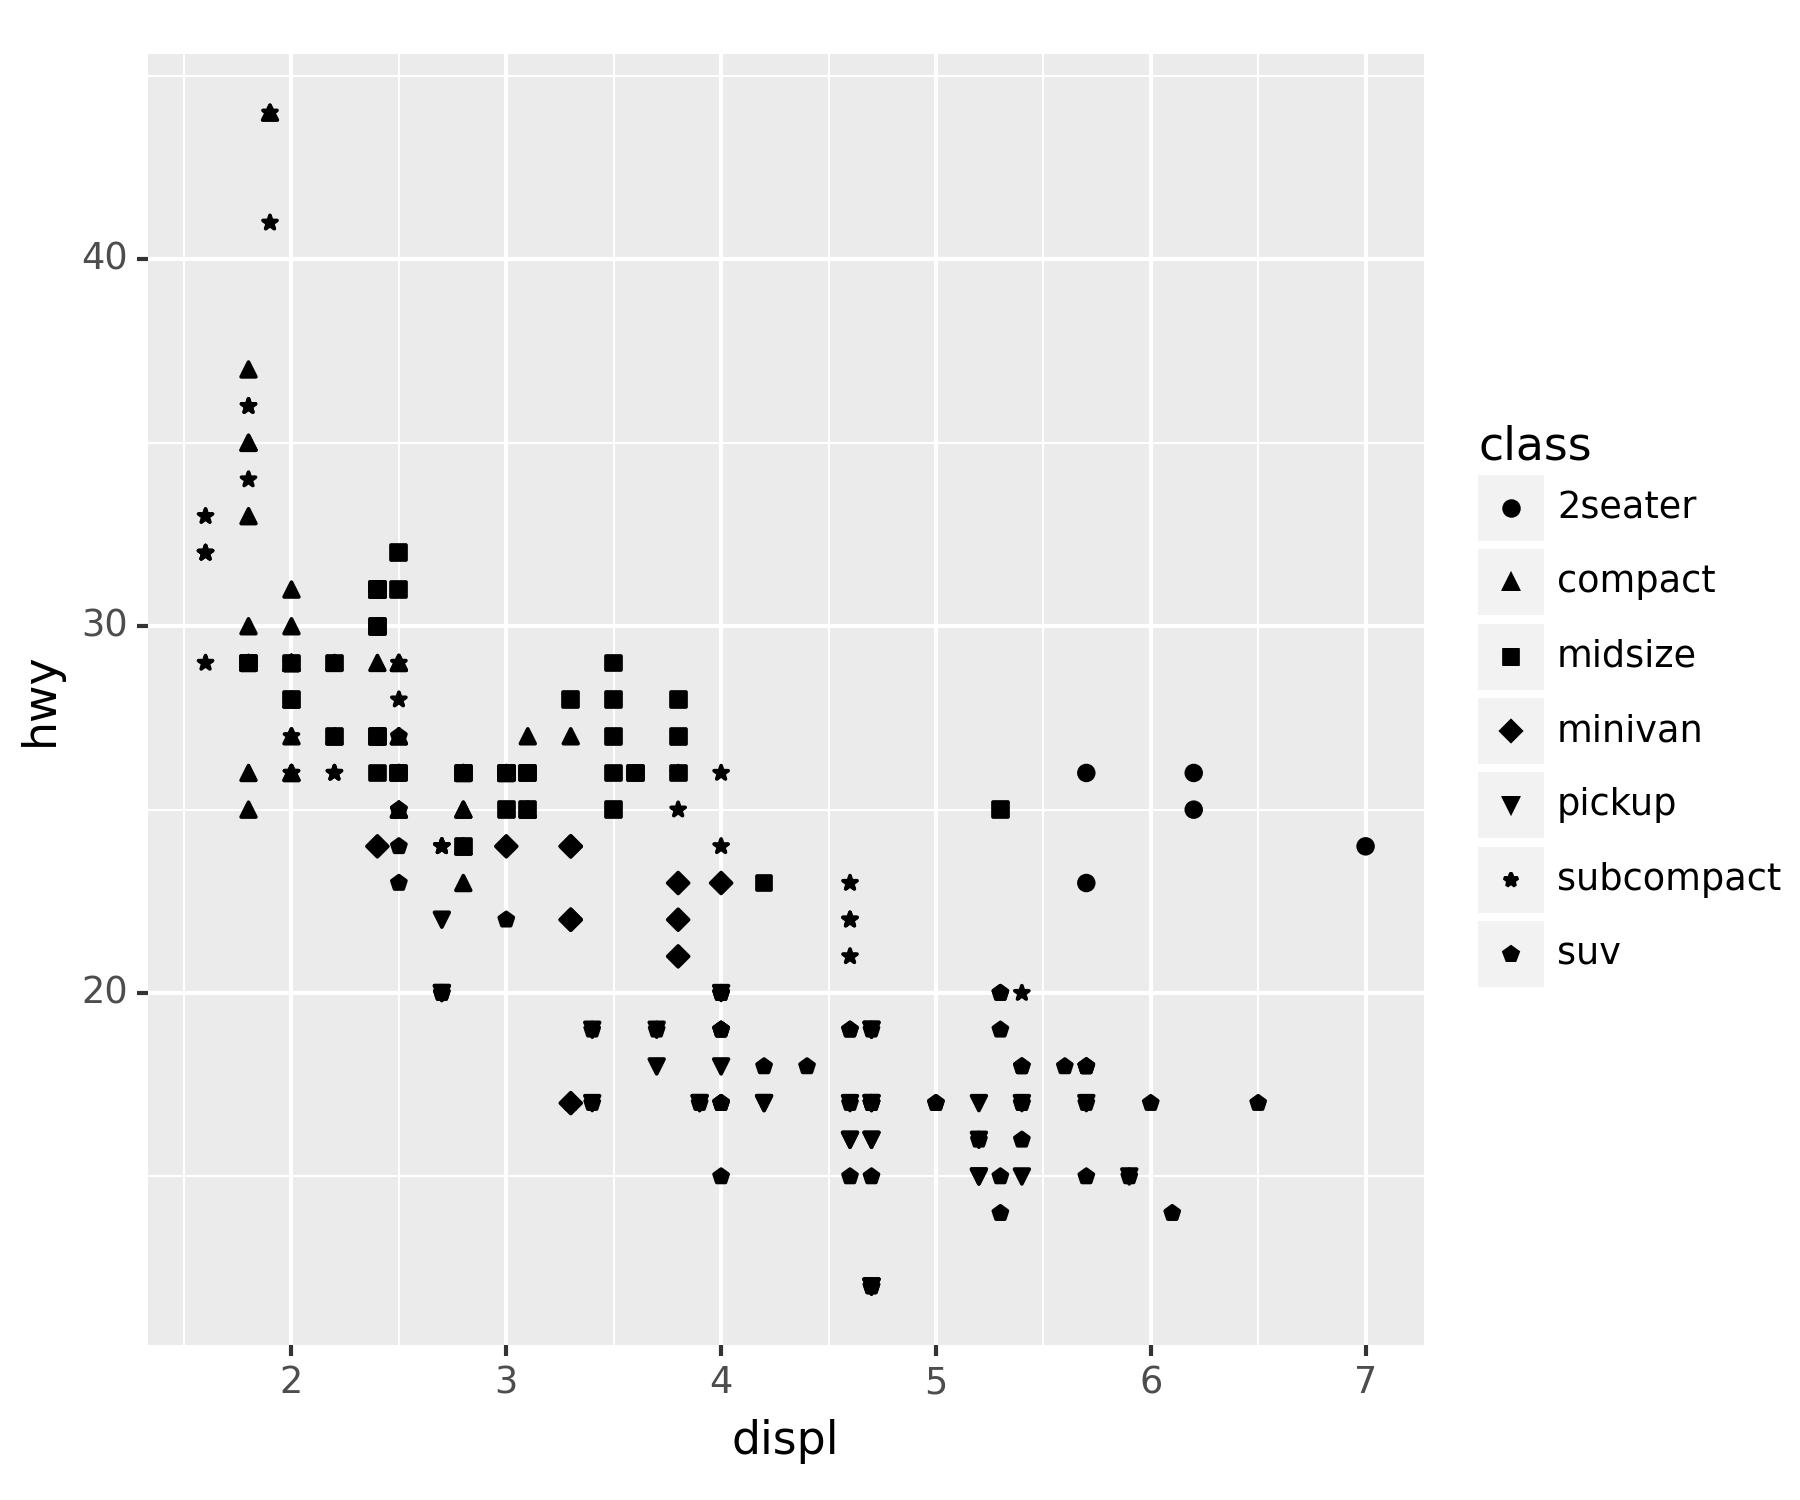

<Figure Size: (900 x 750)>

In [10]:
ggplot(df) + geom_point(aes(x = 'displ', y = 'hwy', shape = 'class'))   ## class를 shape로 구분 > 불편함

### **B. `x=displ`, `y=hwy`, `color=class`**
---

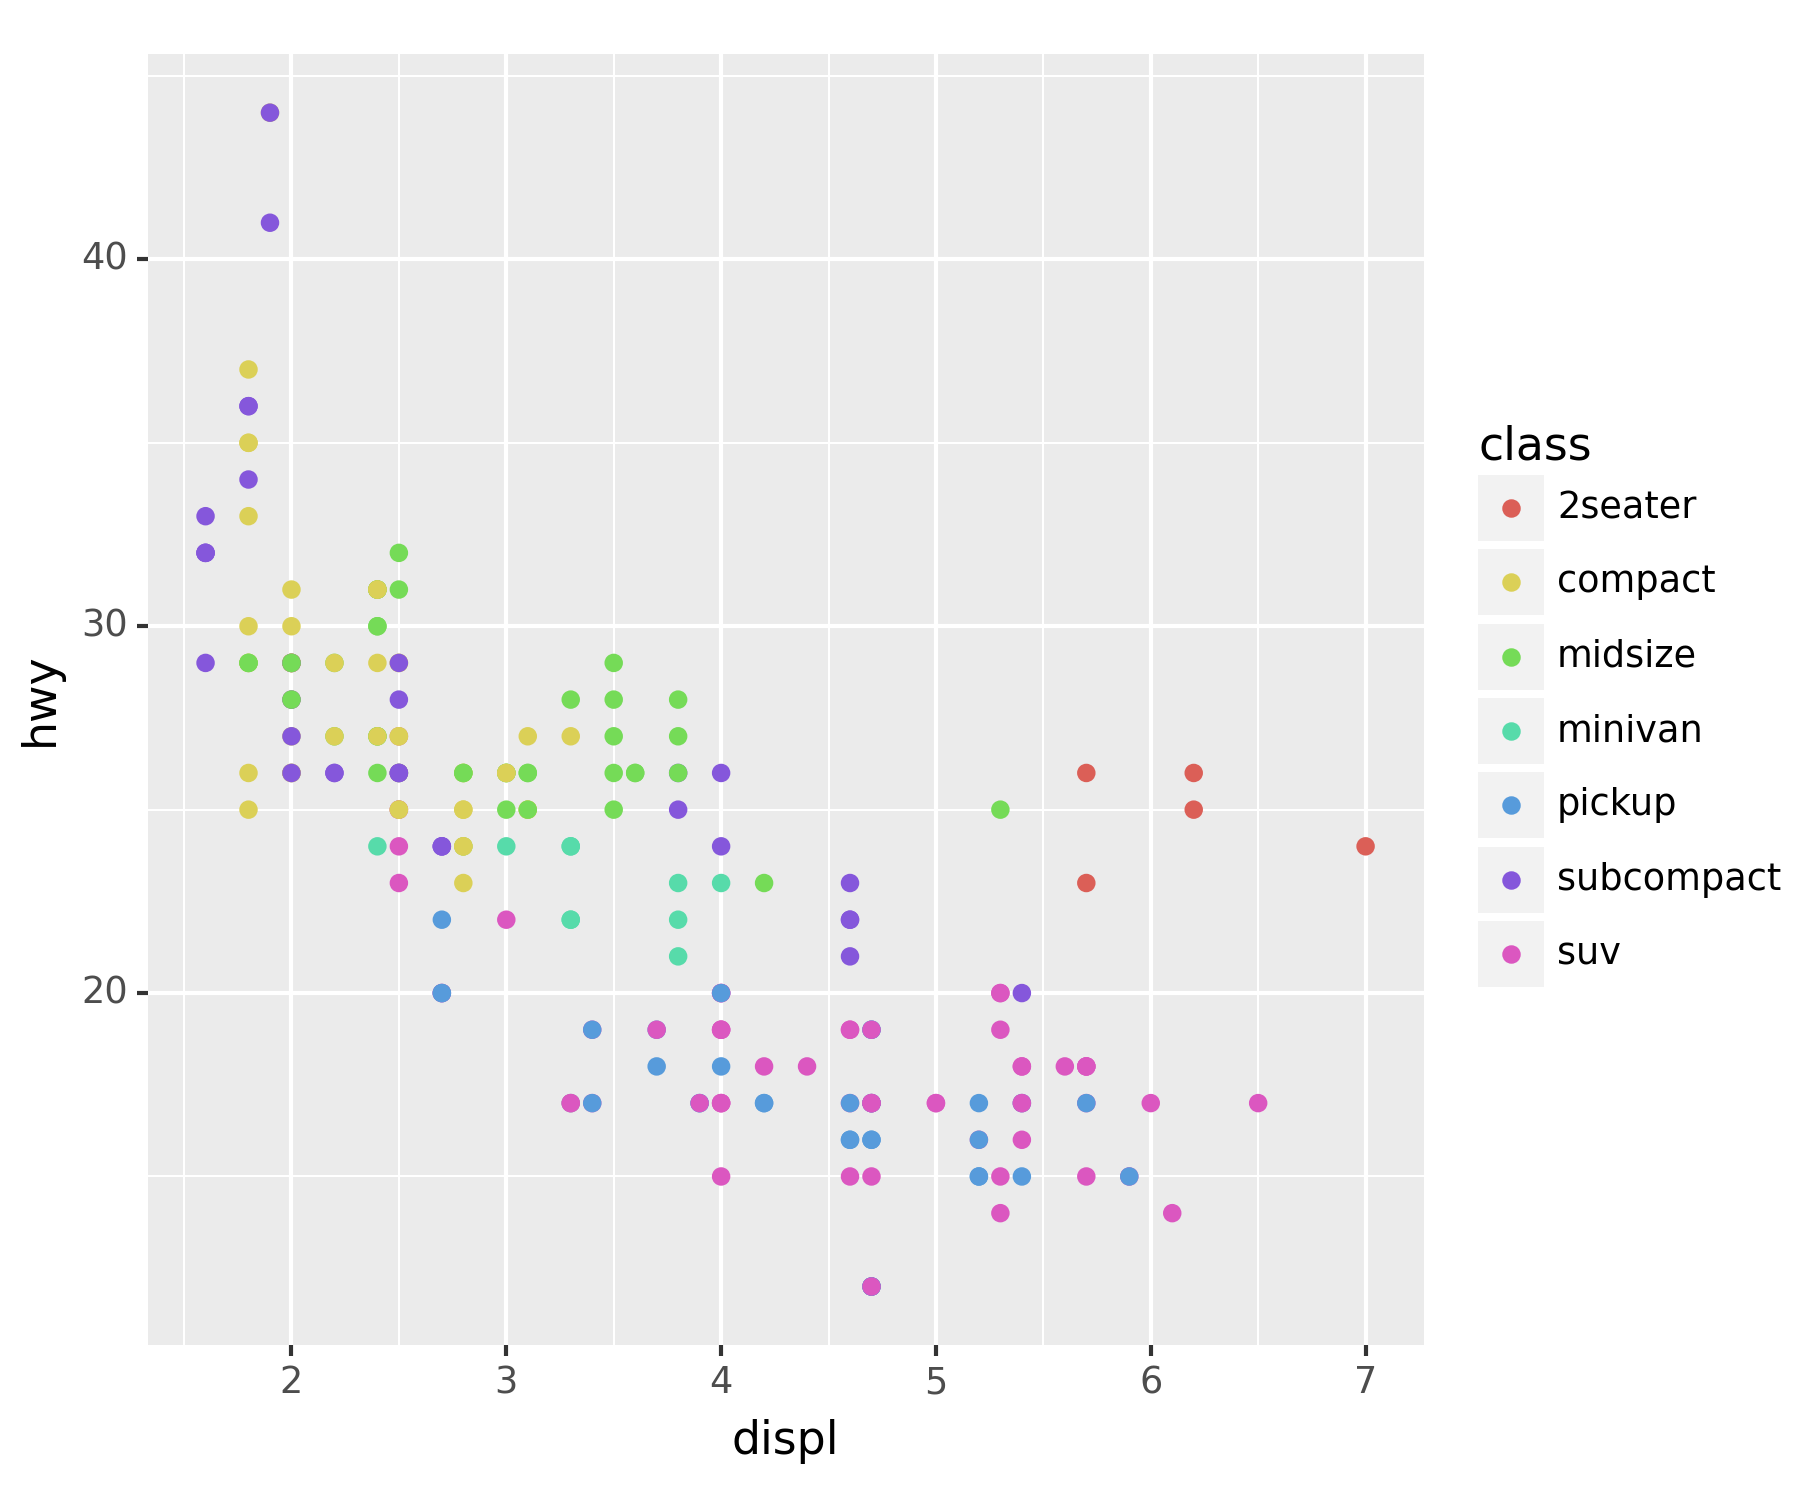

<Figure Size: (900 x 750)>

In [11]:
ggplot(df) + geom_point(aes(x = 'displ', y = 'hwy', color = 'class'))

* 모양까지 class별로 달랐으면 좋겠다.

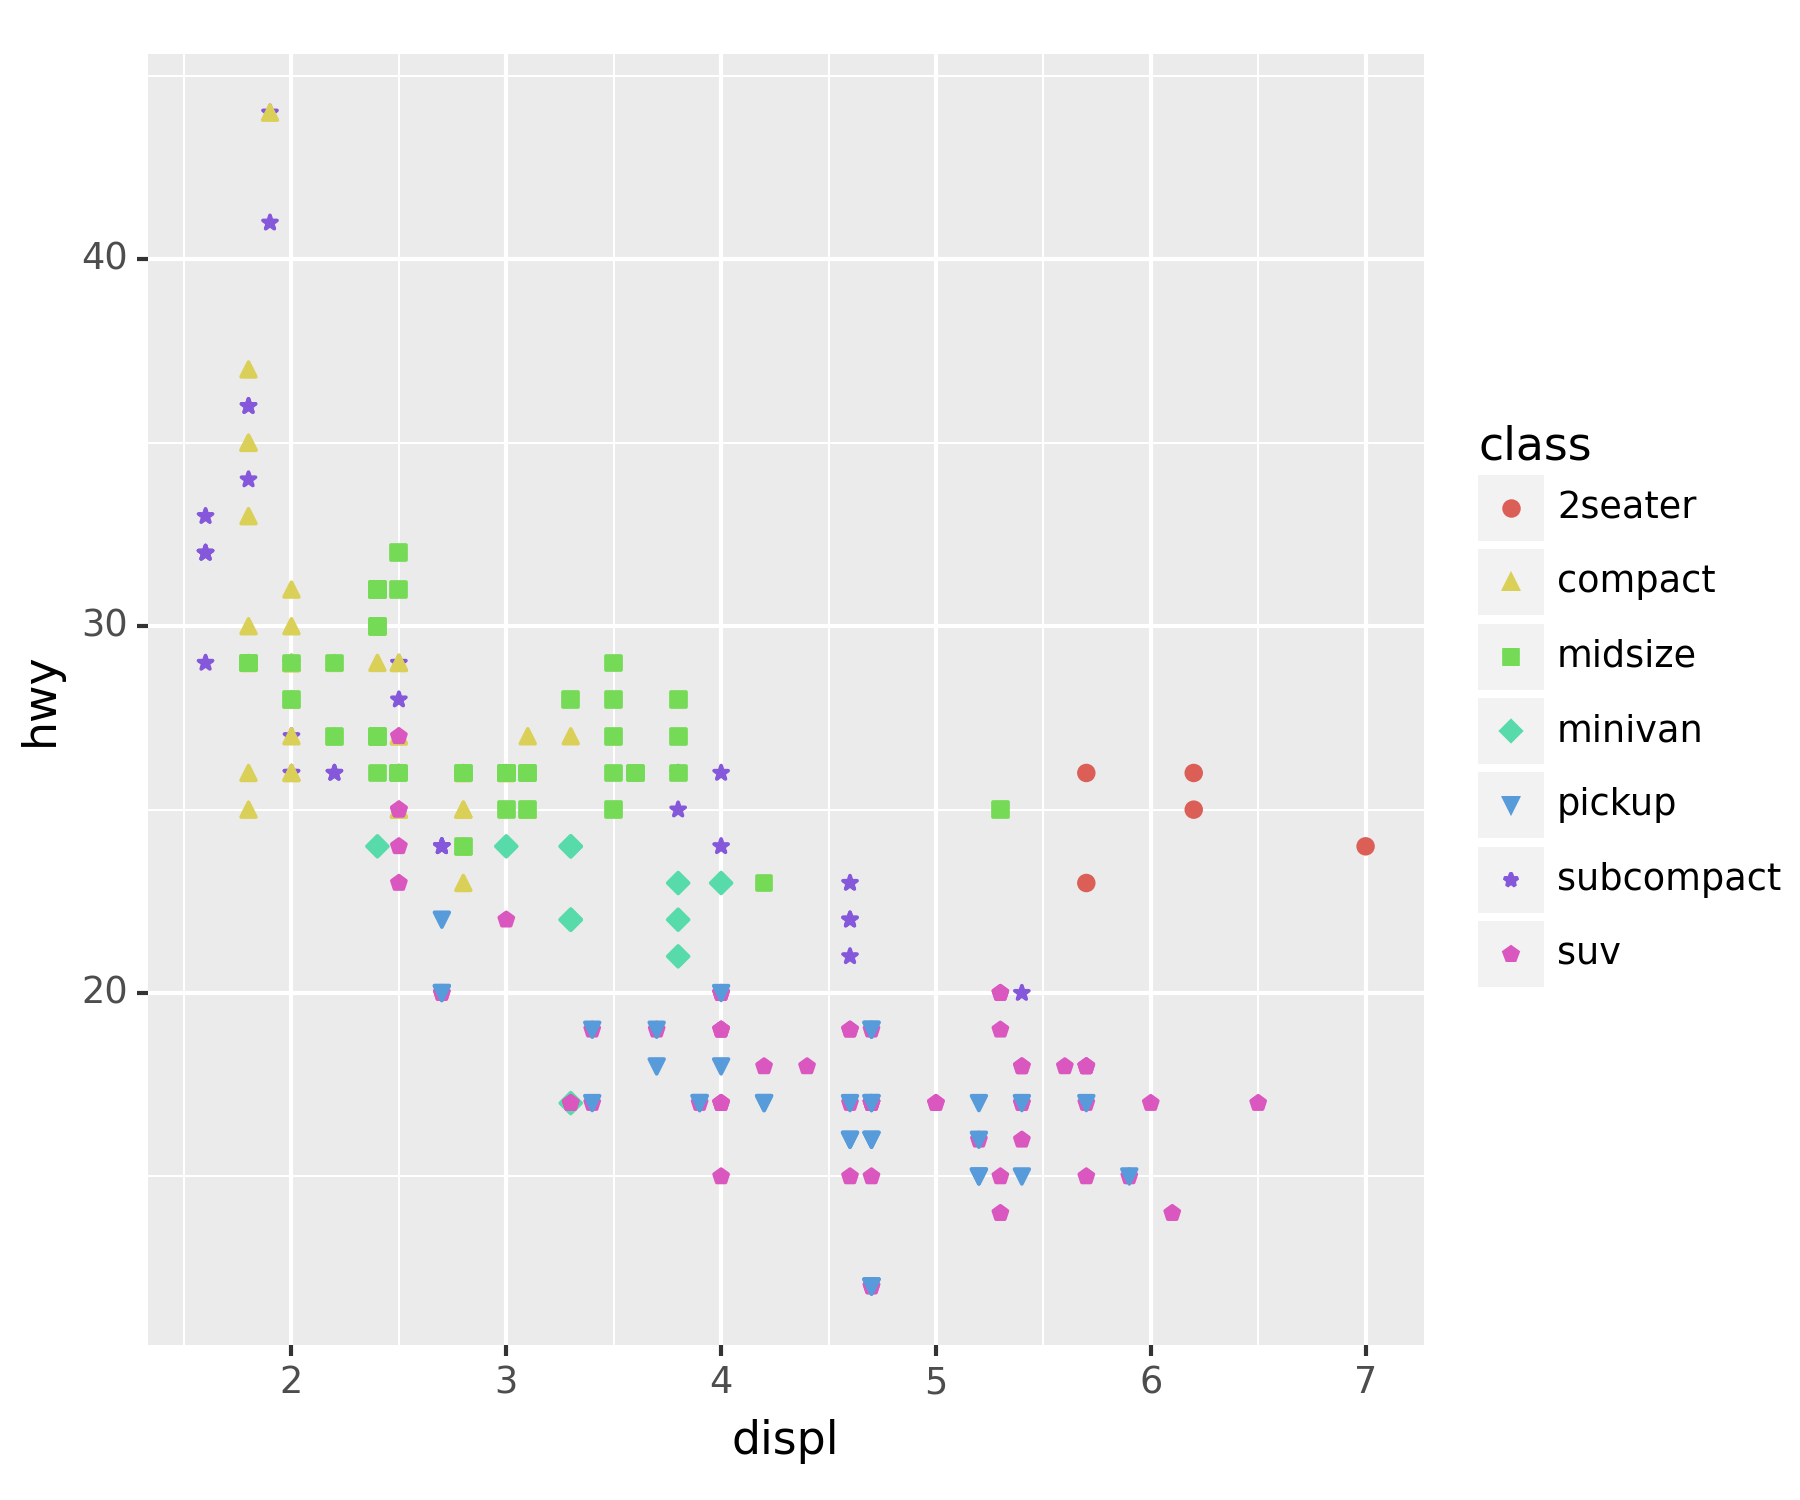

<Figure Size: (900 x 750)>

In [12]:
ggplot(df) + geom_point(aes(x = 'displ', y = 'hwy', color = 'class', shape = 'class'))

* 전체적으로 포인트의 사이즈를 키우고 싶다.

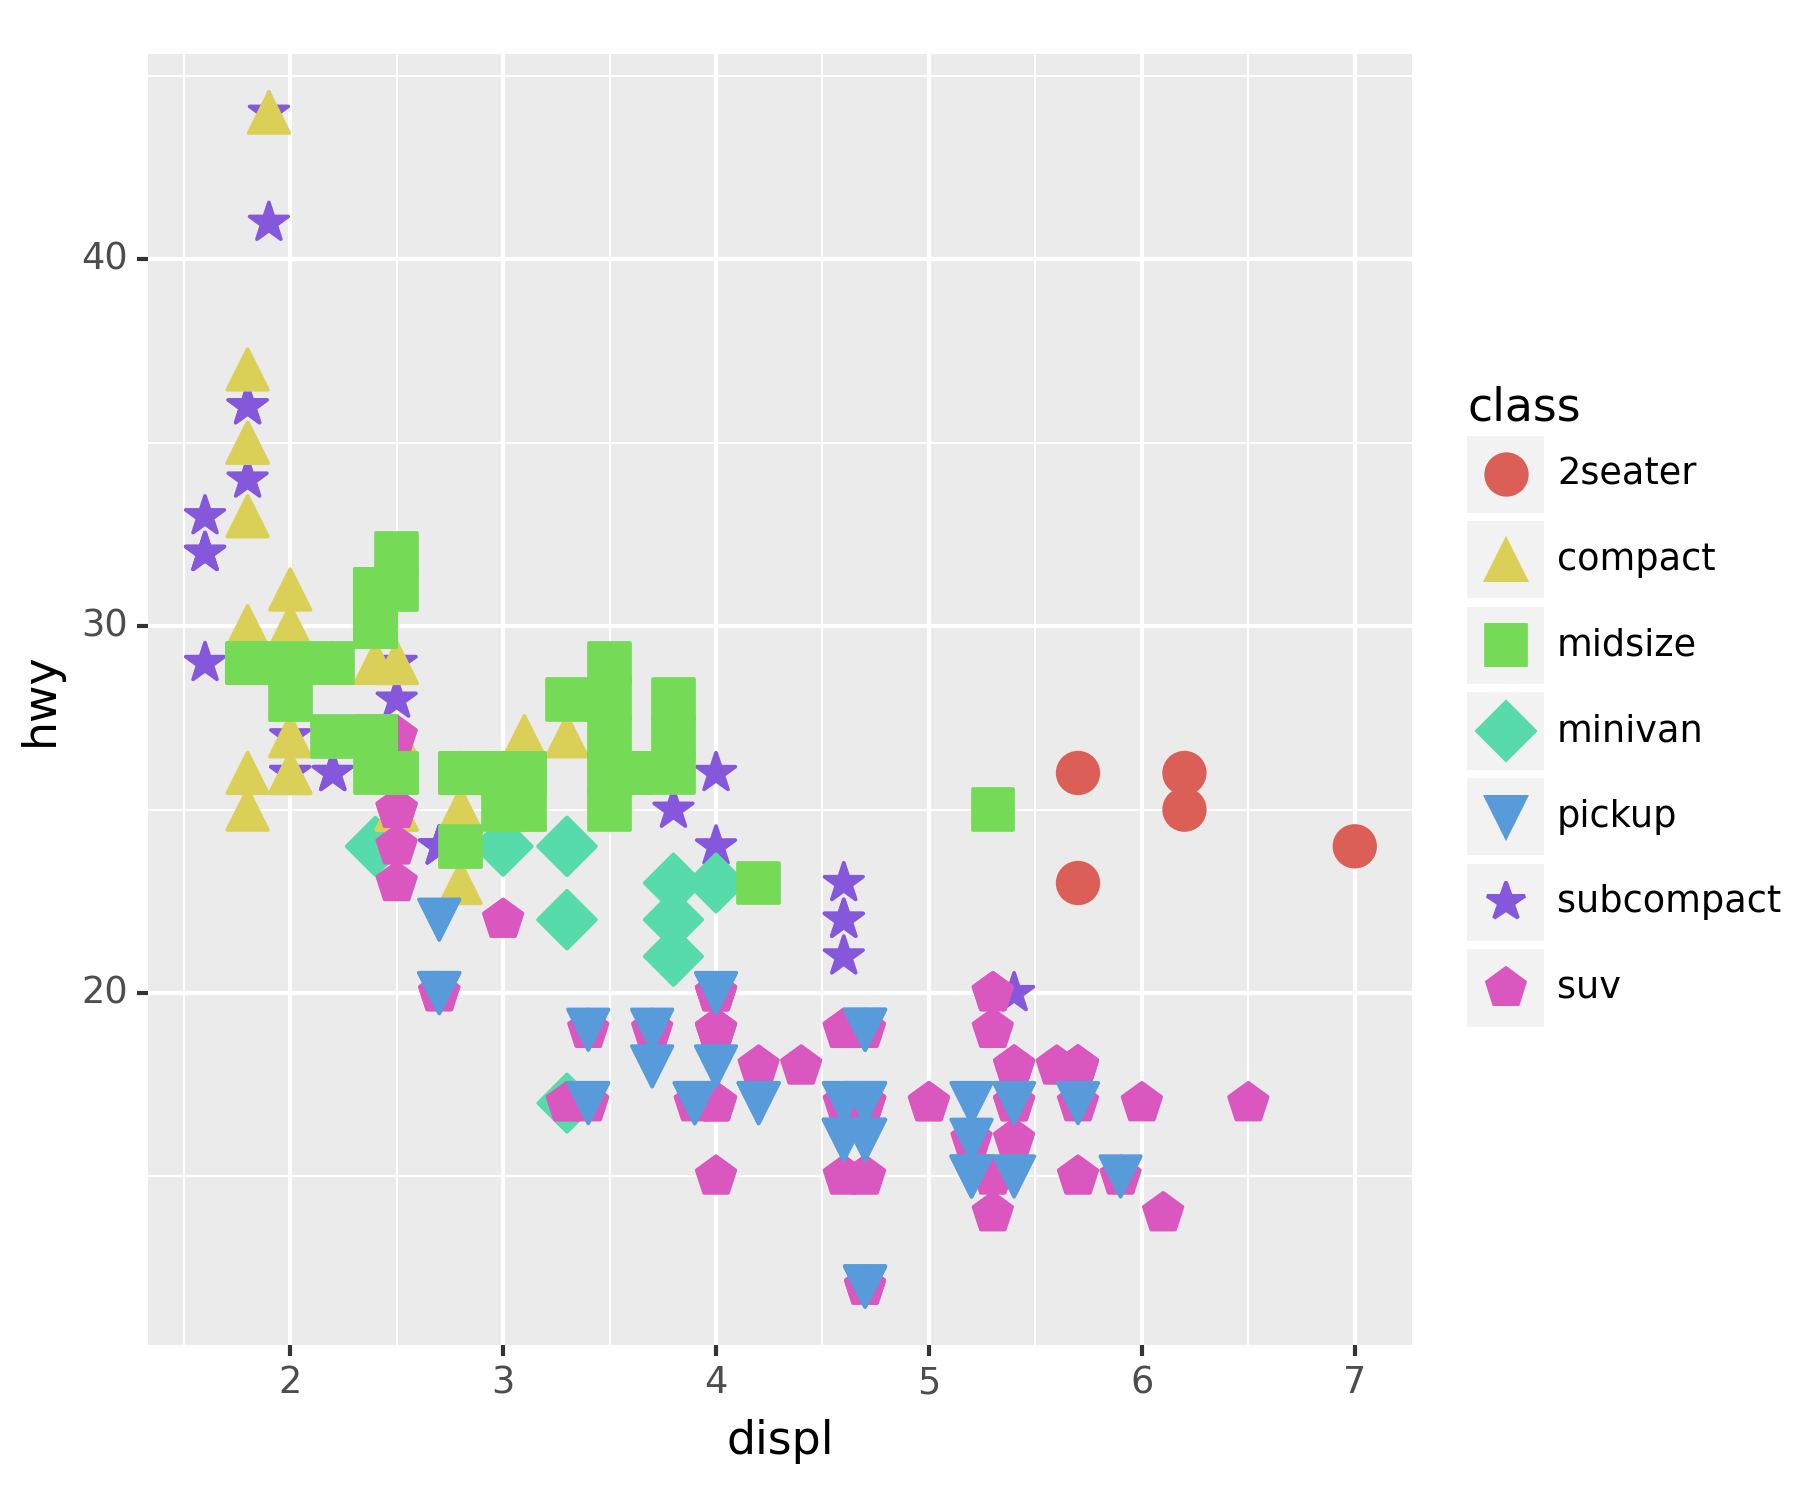

<Figure Size: (900 x 750)>

In [13]:
ggplot(df) + geom_point(aes(x = 'displ', y = 'hwy', color = 'class', shape = 'class'), size = 5)  ## 외부 파라미터

* 너무 커서 겹치니까 투명도 조정

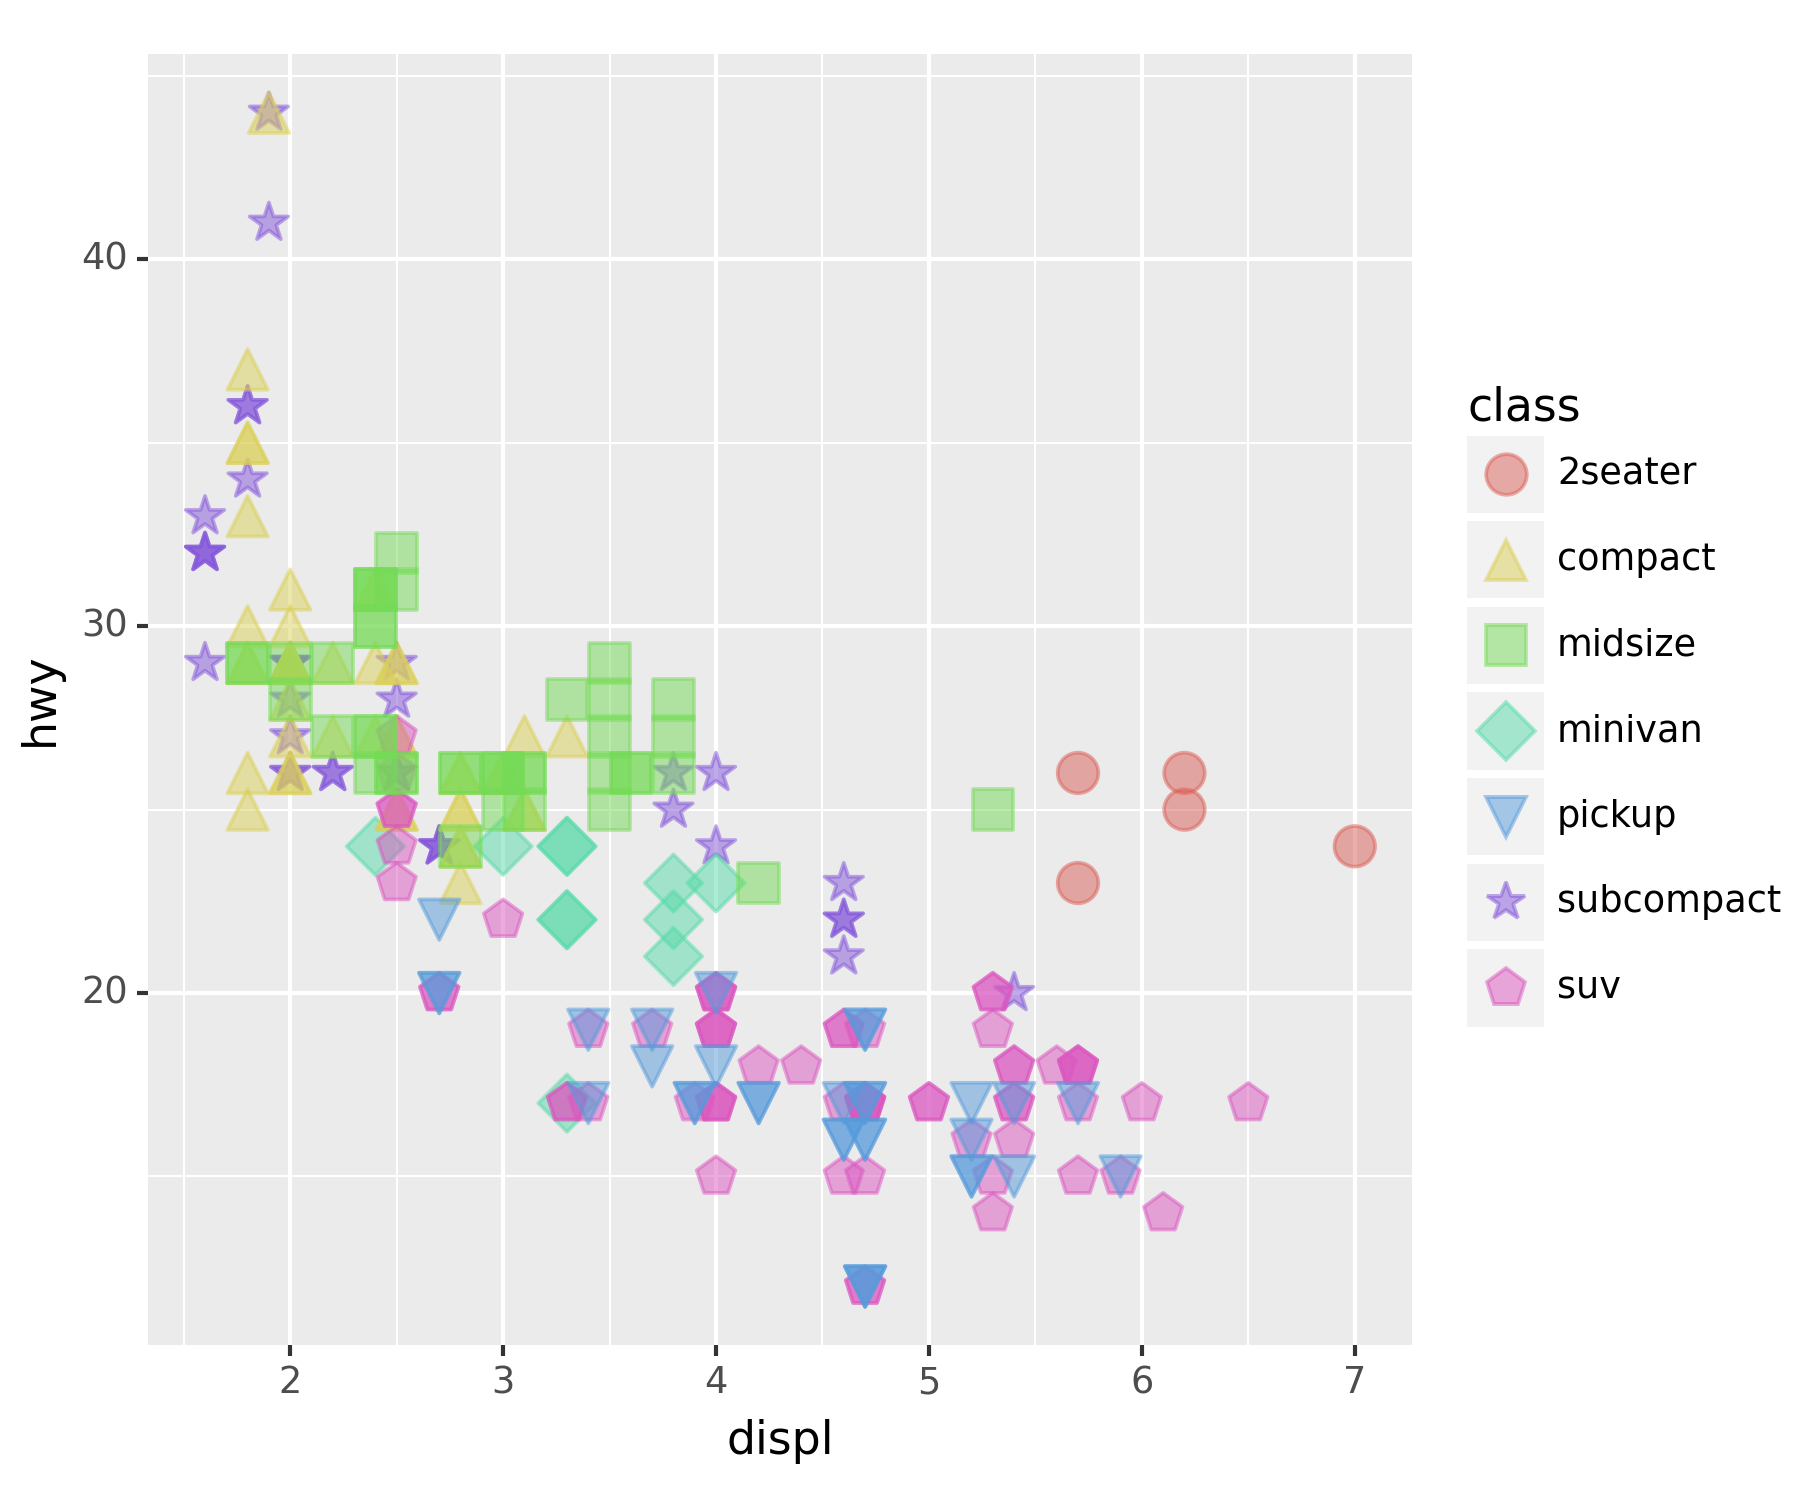

<Figure Size: (900 x 750)>

In [14]:
ggplot(df) + geom_point(aes(x = 'displ', y = 'hwy', color = 'class', shape = 'class'), size = 5, alpha = 0.5)

> ```geom_point()```에서 내부 aes()에 넣은 값들은 값들을 구분하도록 되며, 외부에 입력된 값은 전체 개체들을 바꿔버린다.

## 5. mpg의 시각화 : 4차원, 5차원

In [15]:
set(df['drv'])  ## 4륜구동, 전륜구동(front), 후륜구동(r)

{'4', 'f', 'r'}

### **A. drive metiod에 더 중점**
---

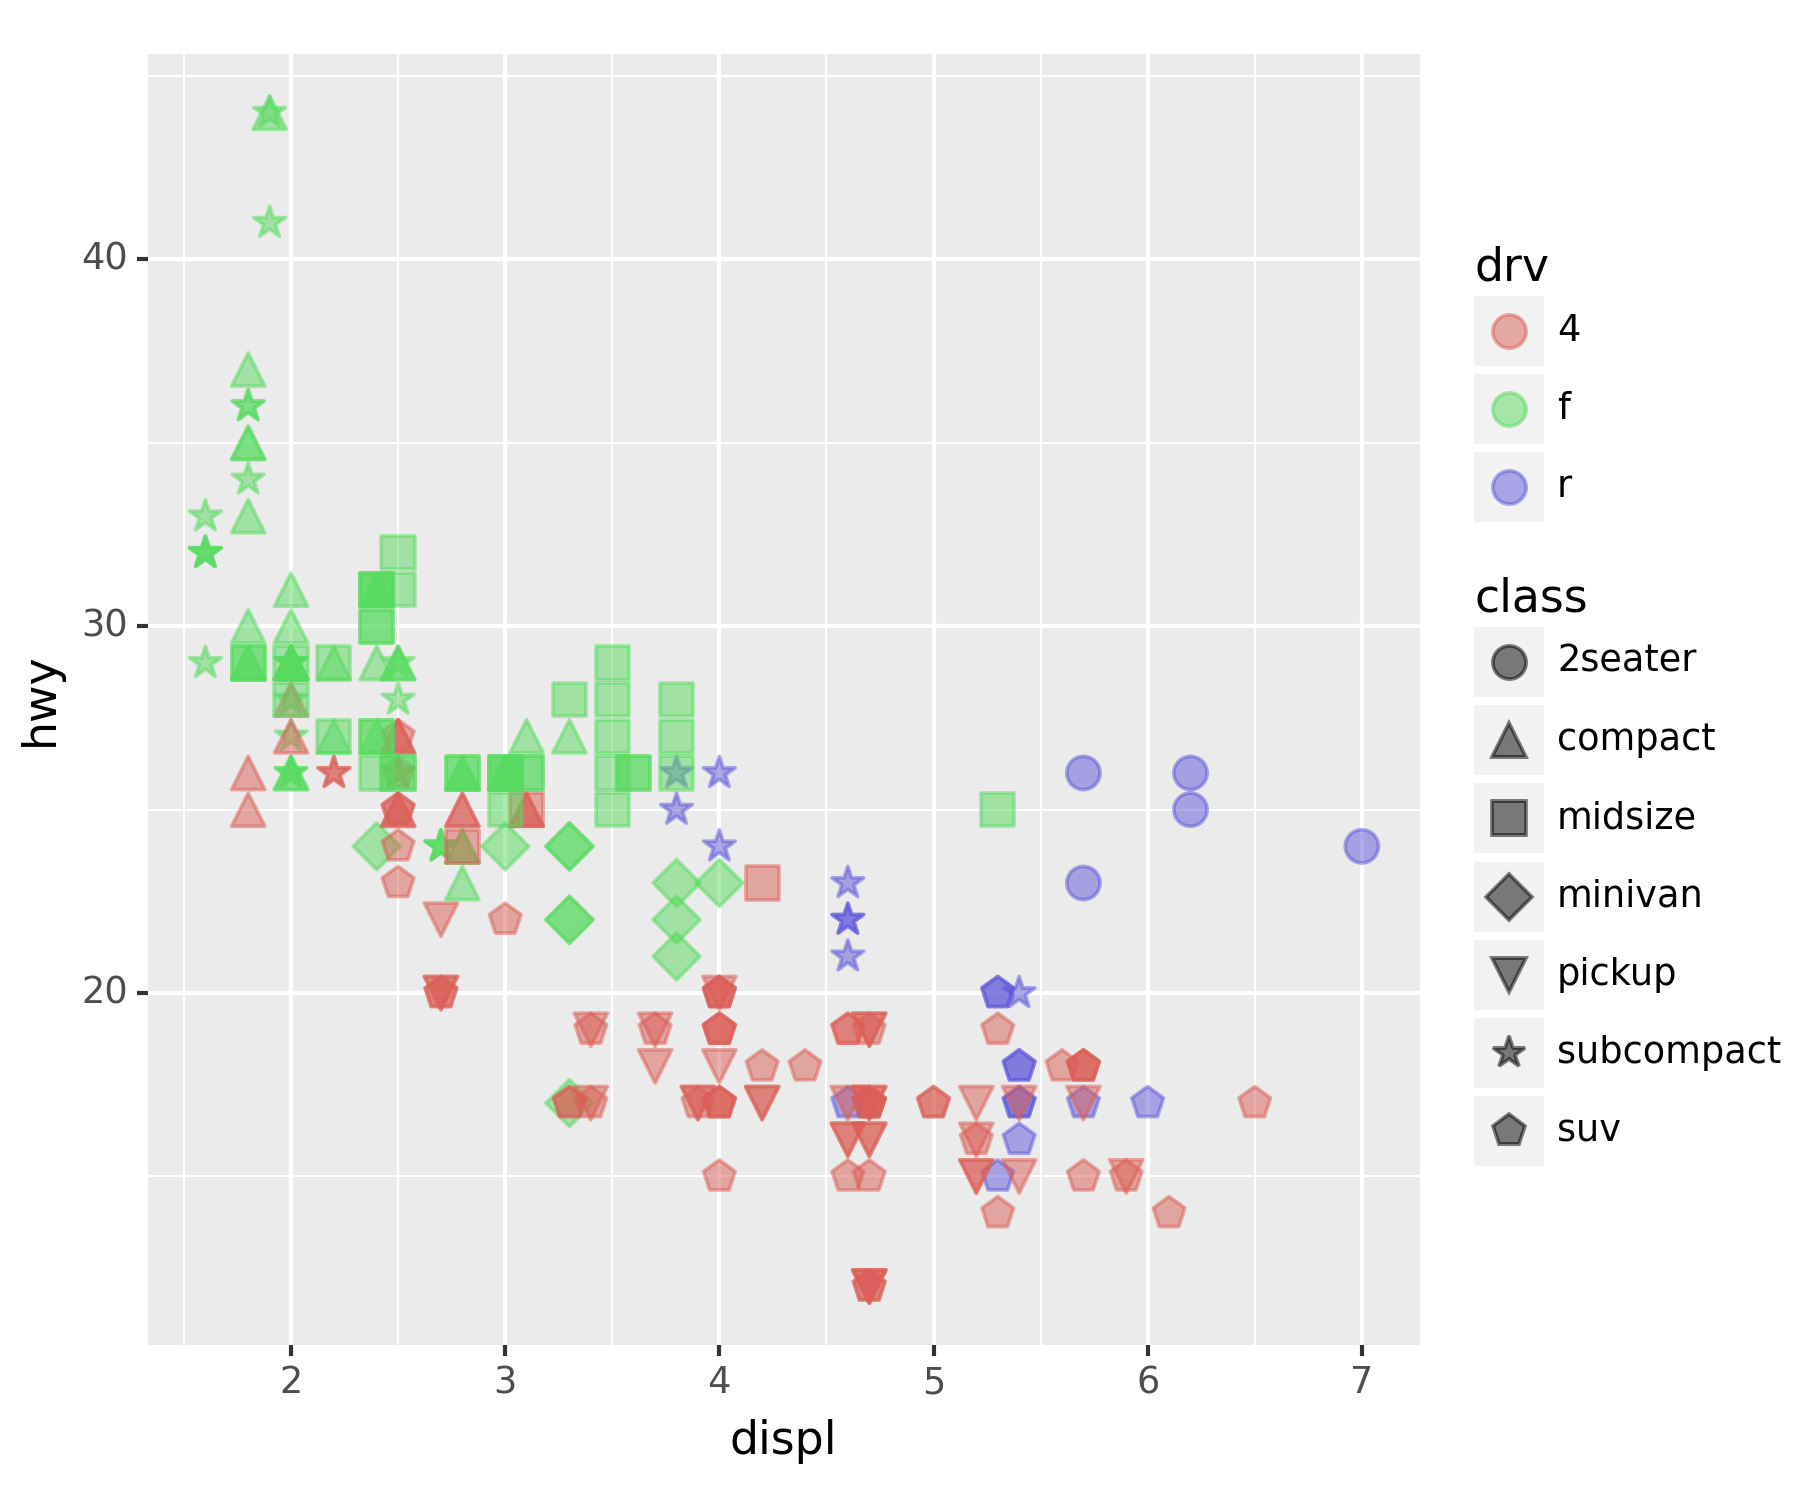

<Figure Size: (900 x 750)>

In [16]:
ggplot(df) + geom_point(aes(x = 'displ', y = 'hwy', color = 'drv', shape = 'class'), size = 4, alpha = 0.5)

> 4륜구동이 연비가 낮은 걸 확인할 수 있다.

### **B. 5차원 시각화**
---


In [17]:
set(df['cyl'])  ## 실린더 수, 4,5,6,8

{4, 5, 6, 8}

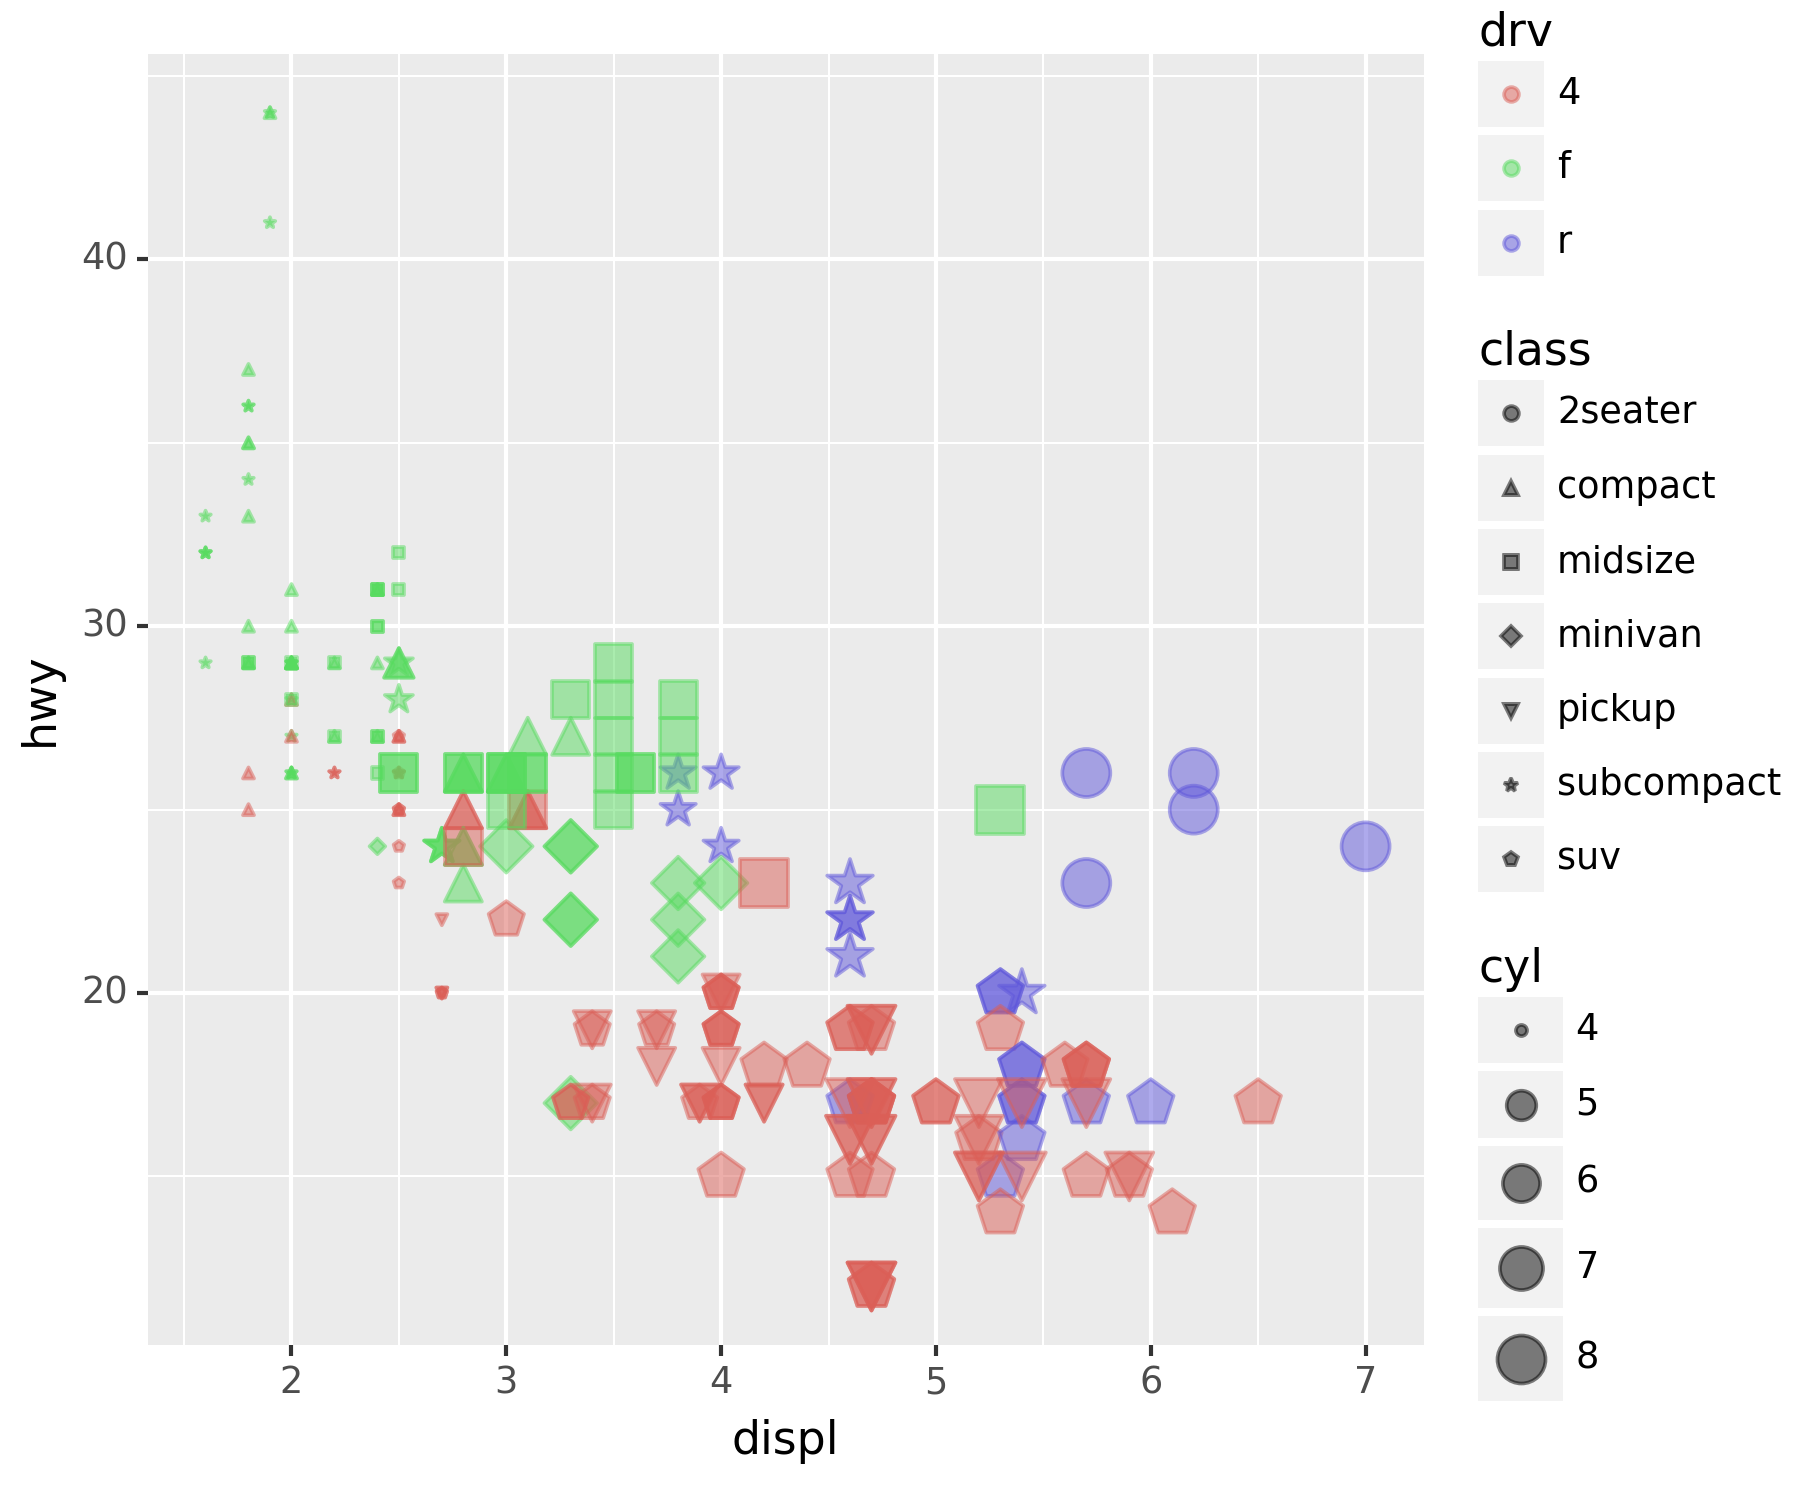

<Figure Size: (900 x 750)>

In [18]:
ggplot(df) + geom_point(aes(x='displ',y='hwy',color='drv',shape='class', size = 'cyl'), alpha = 0.5)  ## 외부 파라미터에 size는 제거

> 여기까지가 기본적인 사용 방법이다.

## 6. 객체지향적 시각화

```-``` ```ggplot```의 정체는 뭐지?

In [19]:
type(ggplot)

type

> class. 어떤 물체를 만들어내는 함수와 비슷. matplotlib에서의 `plt.figure()`와 유사하다고 보면 된다.

\- 그럼 `geom_point`는 정체가 뭐지?

In [20]:
type(geom_point)  ## class, 생성함수.

plotnine.utils.Registry

> geom은 그림, 그래프라고 보면 된다. 'fig.add_axes()`후 추가된 `ax`에 그래프를 그리는 것과 유사


### **A. `fig` + `geom_point` + `geom_smooth`**
---

In [21]:
fig  = ggplot(df)
point = geom_point(aes(x = 'displ', y = 'hwy'))

In [22]:
point ## 아무것도 나오지 않음

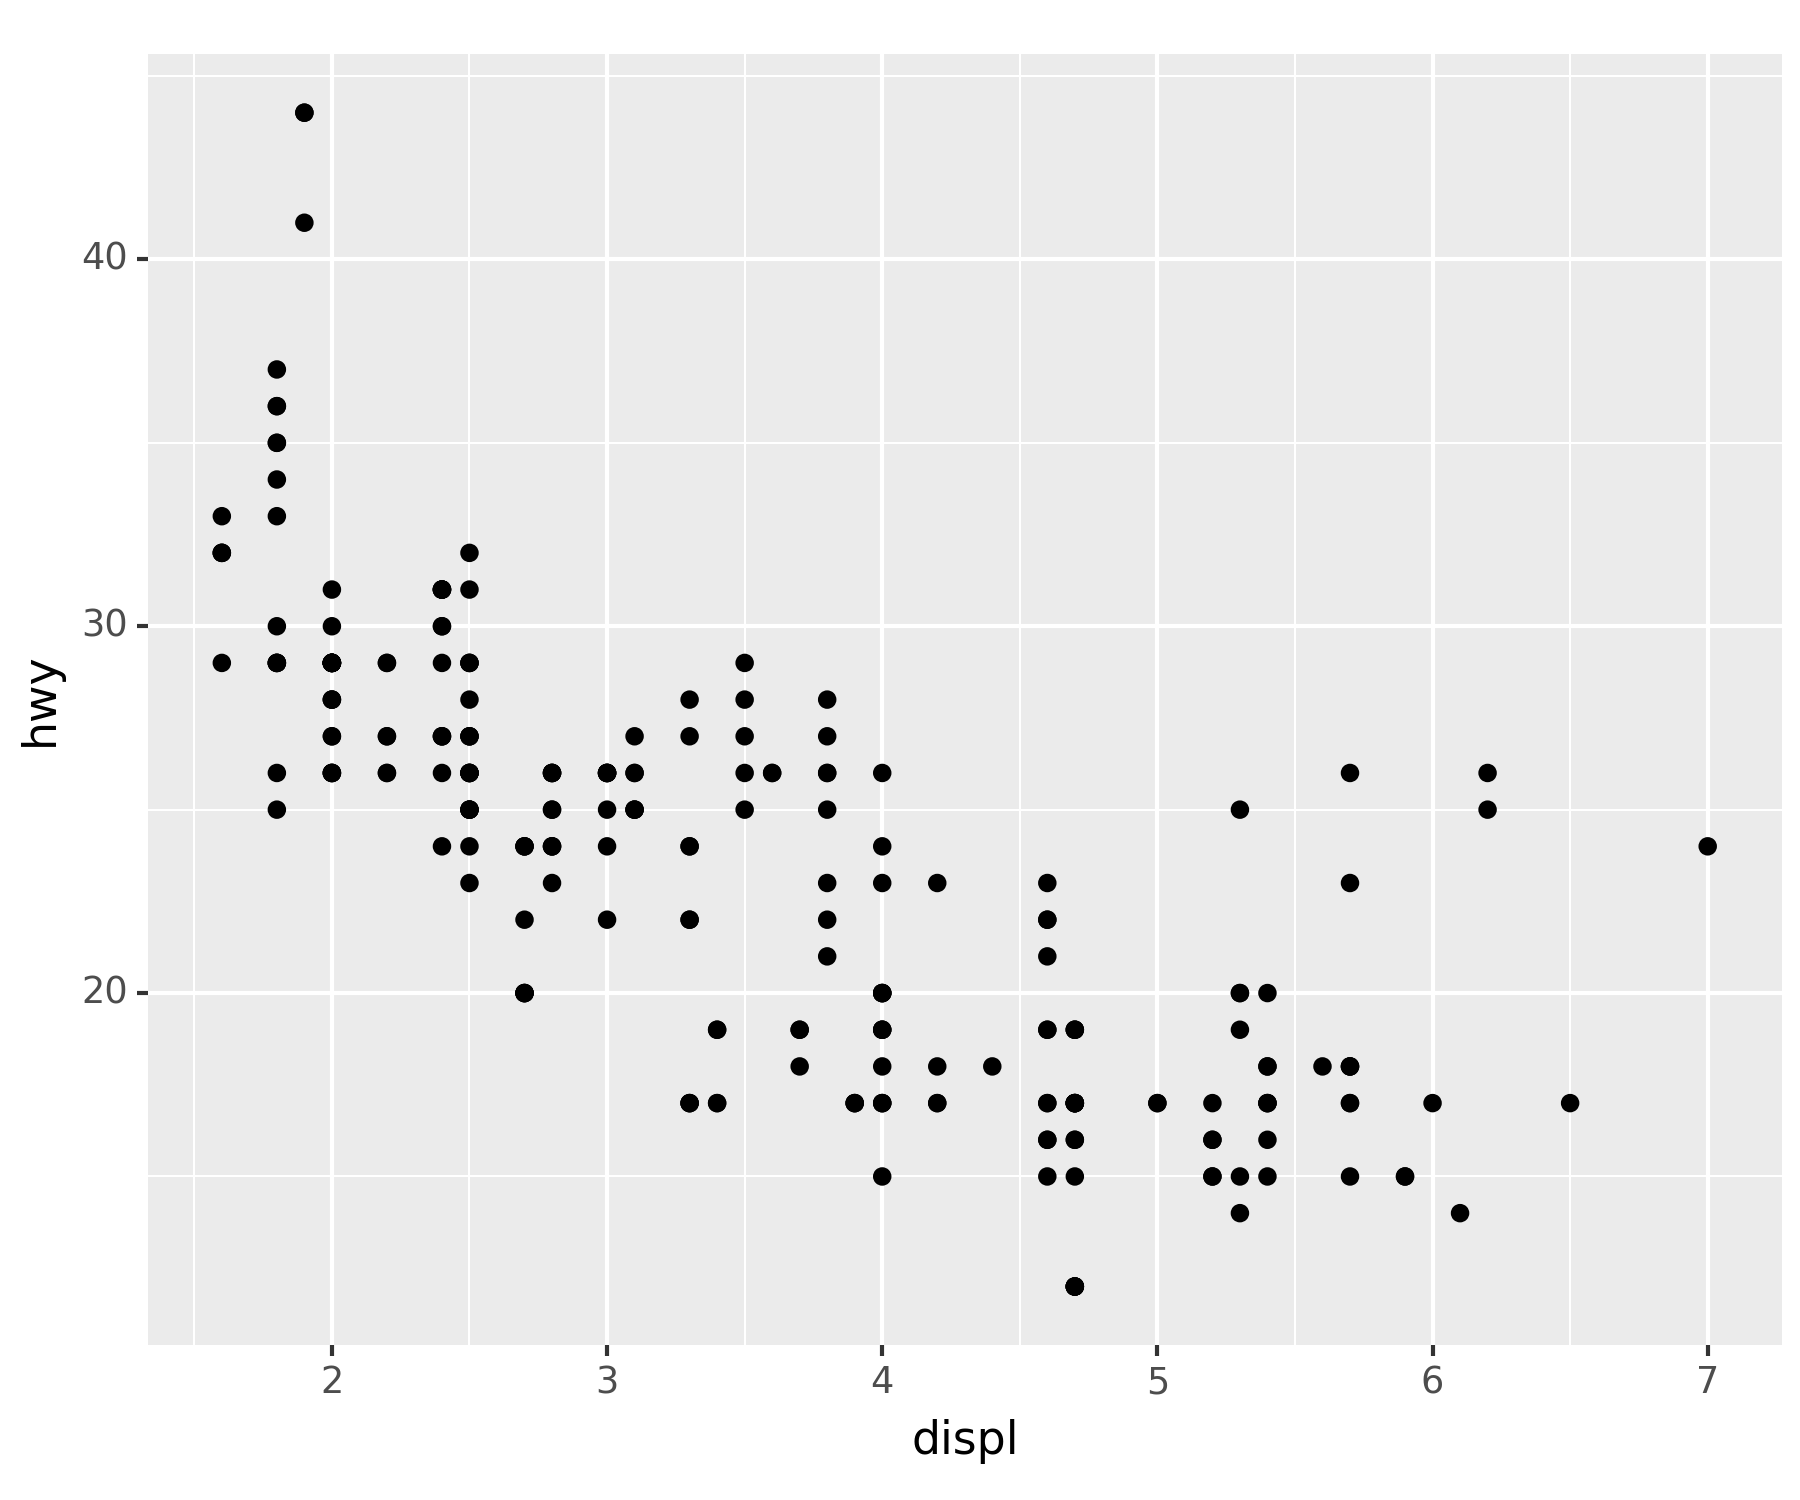

<Figure Size: (900 x 750)>

In [23]:
fig + point

> 두 개체를 합치니 피규어에 그래프가 들어가버린 형태가 되었다.

* `geom_smooth()` | 산점도가 아닌 직선 그래프를 그려준다.

In [24]:
smooth = geom_smooth(aes(x = 'displ', y = 'hwy'))

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


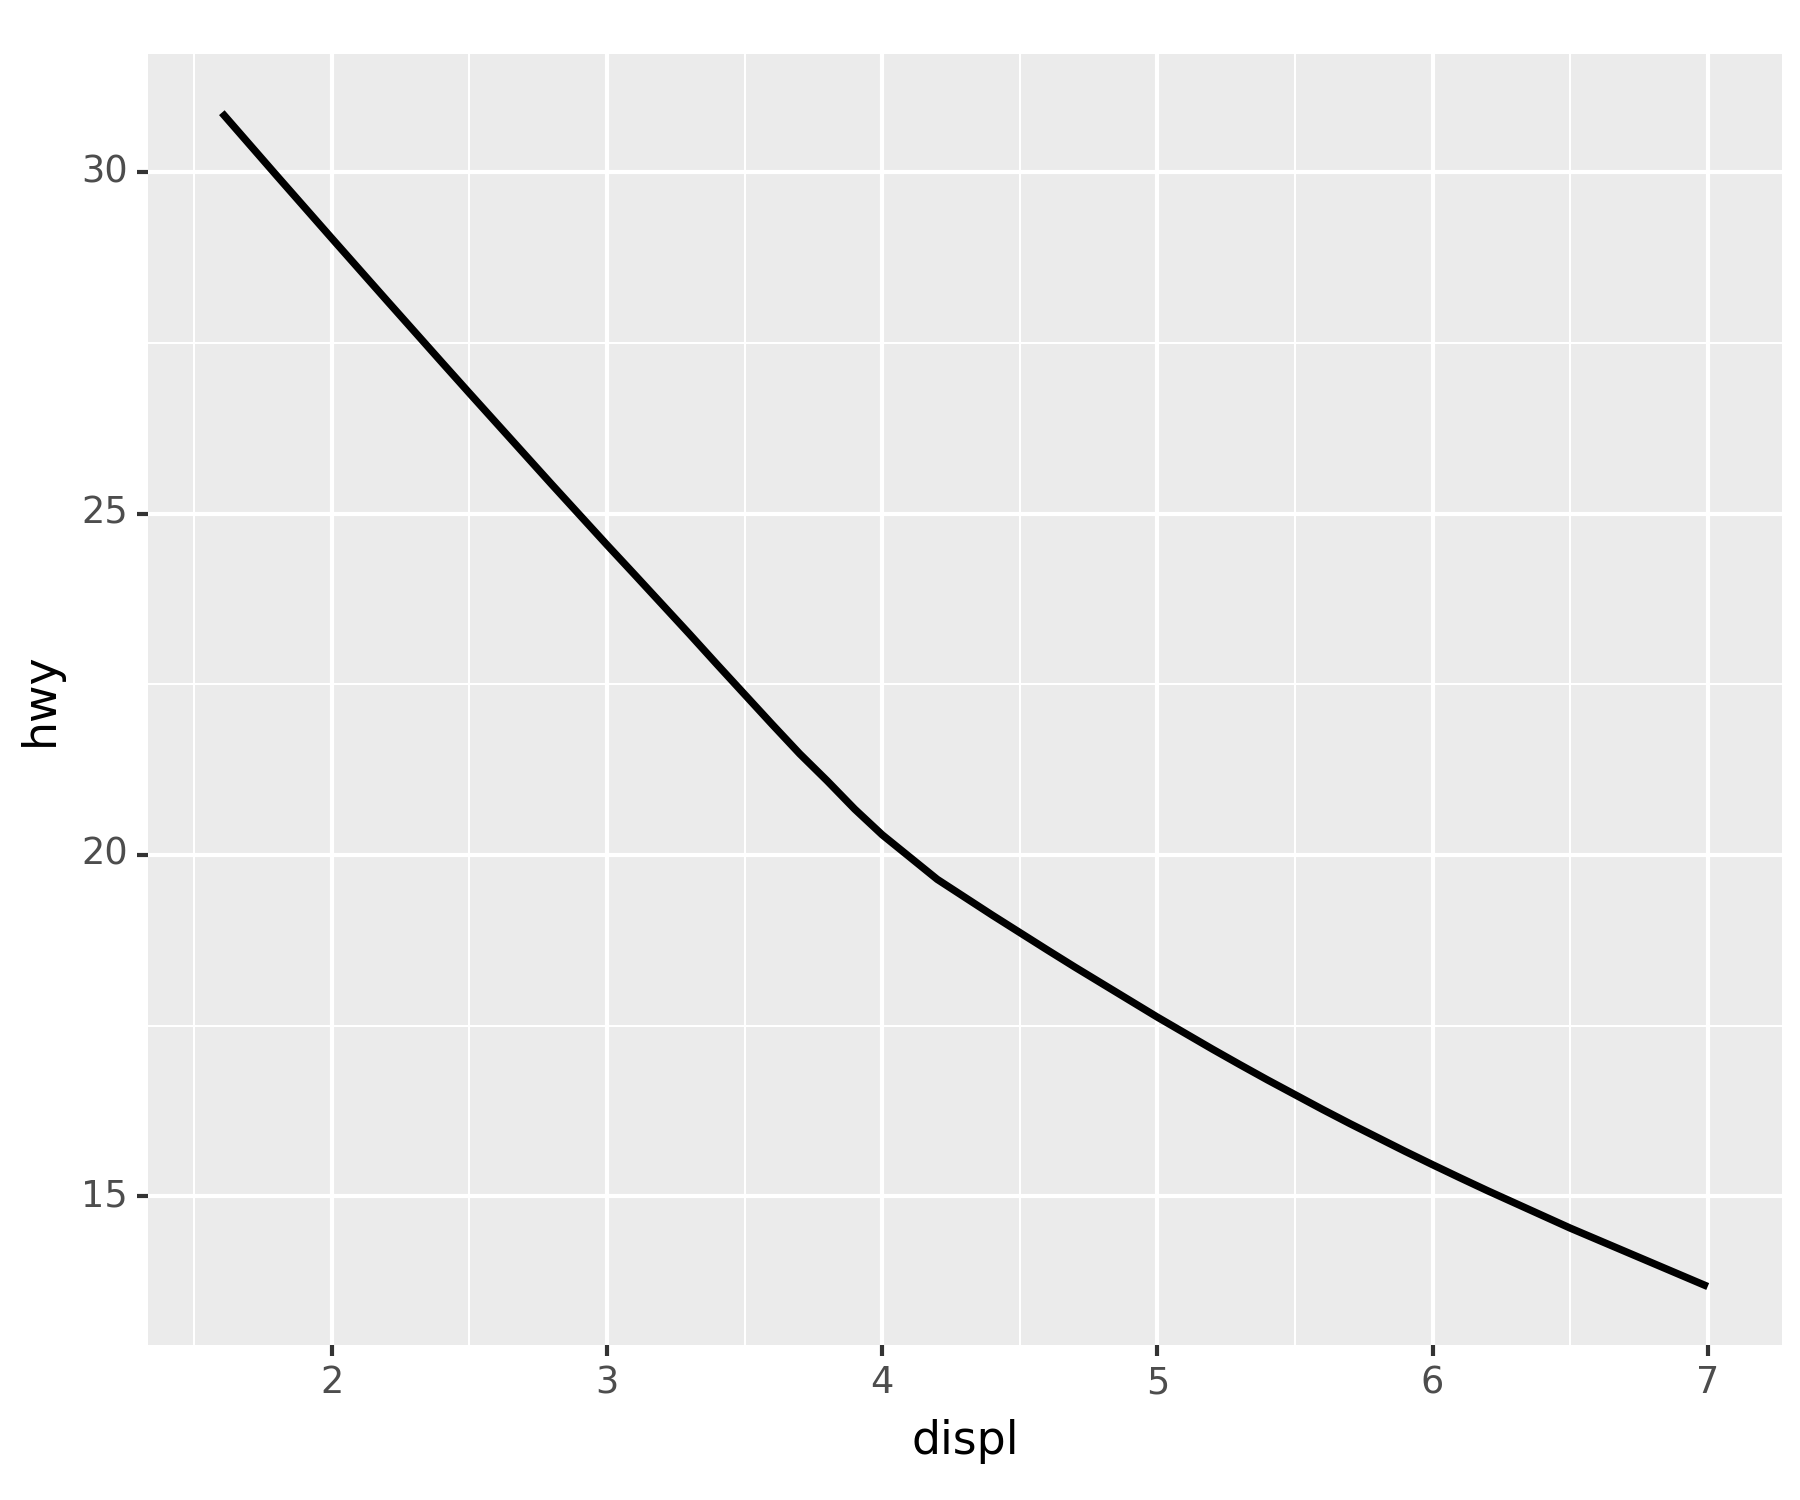

<Figure Size: (900 x 750)>

In [25]:
fig + smooth  ## ggplot(df) + geom_smooth(aes(x = 'displ', y = 'hwy')), 추세선 산출

* 그럼 셋을 합쳐보면...

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


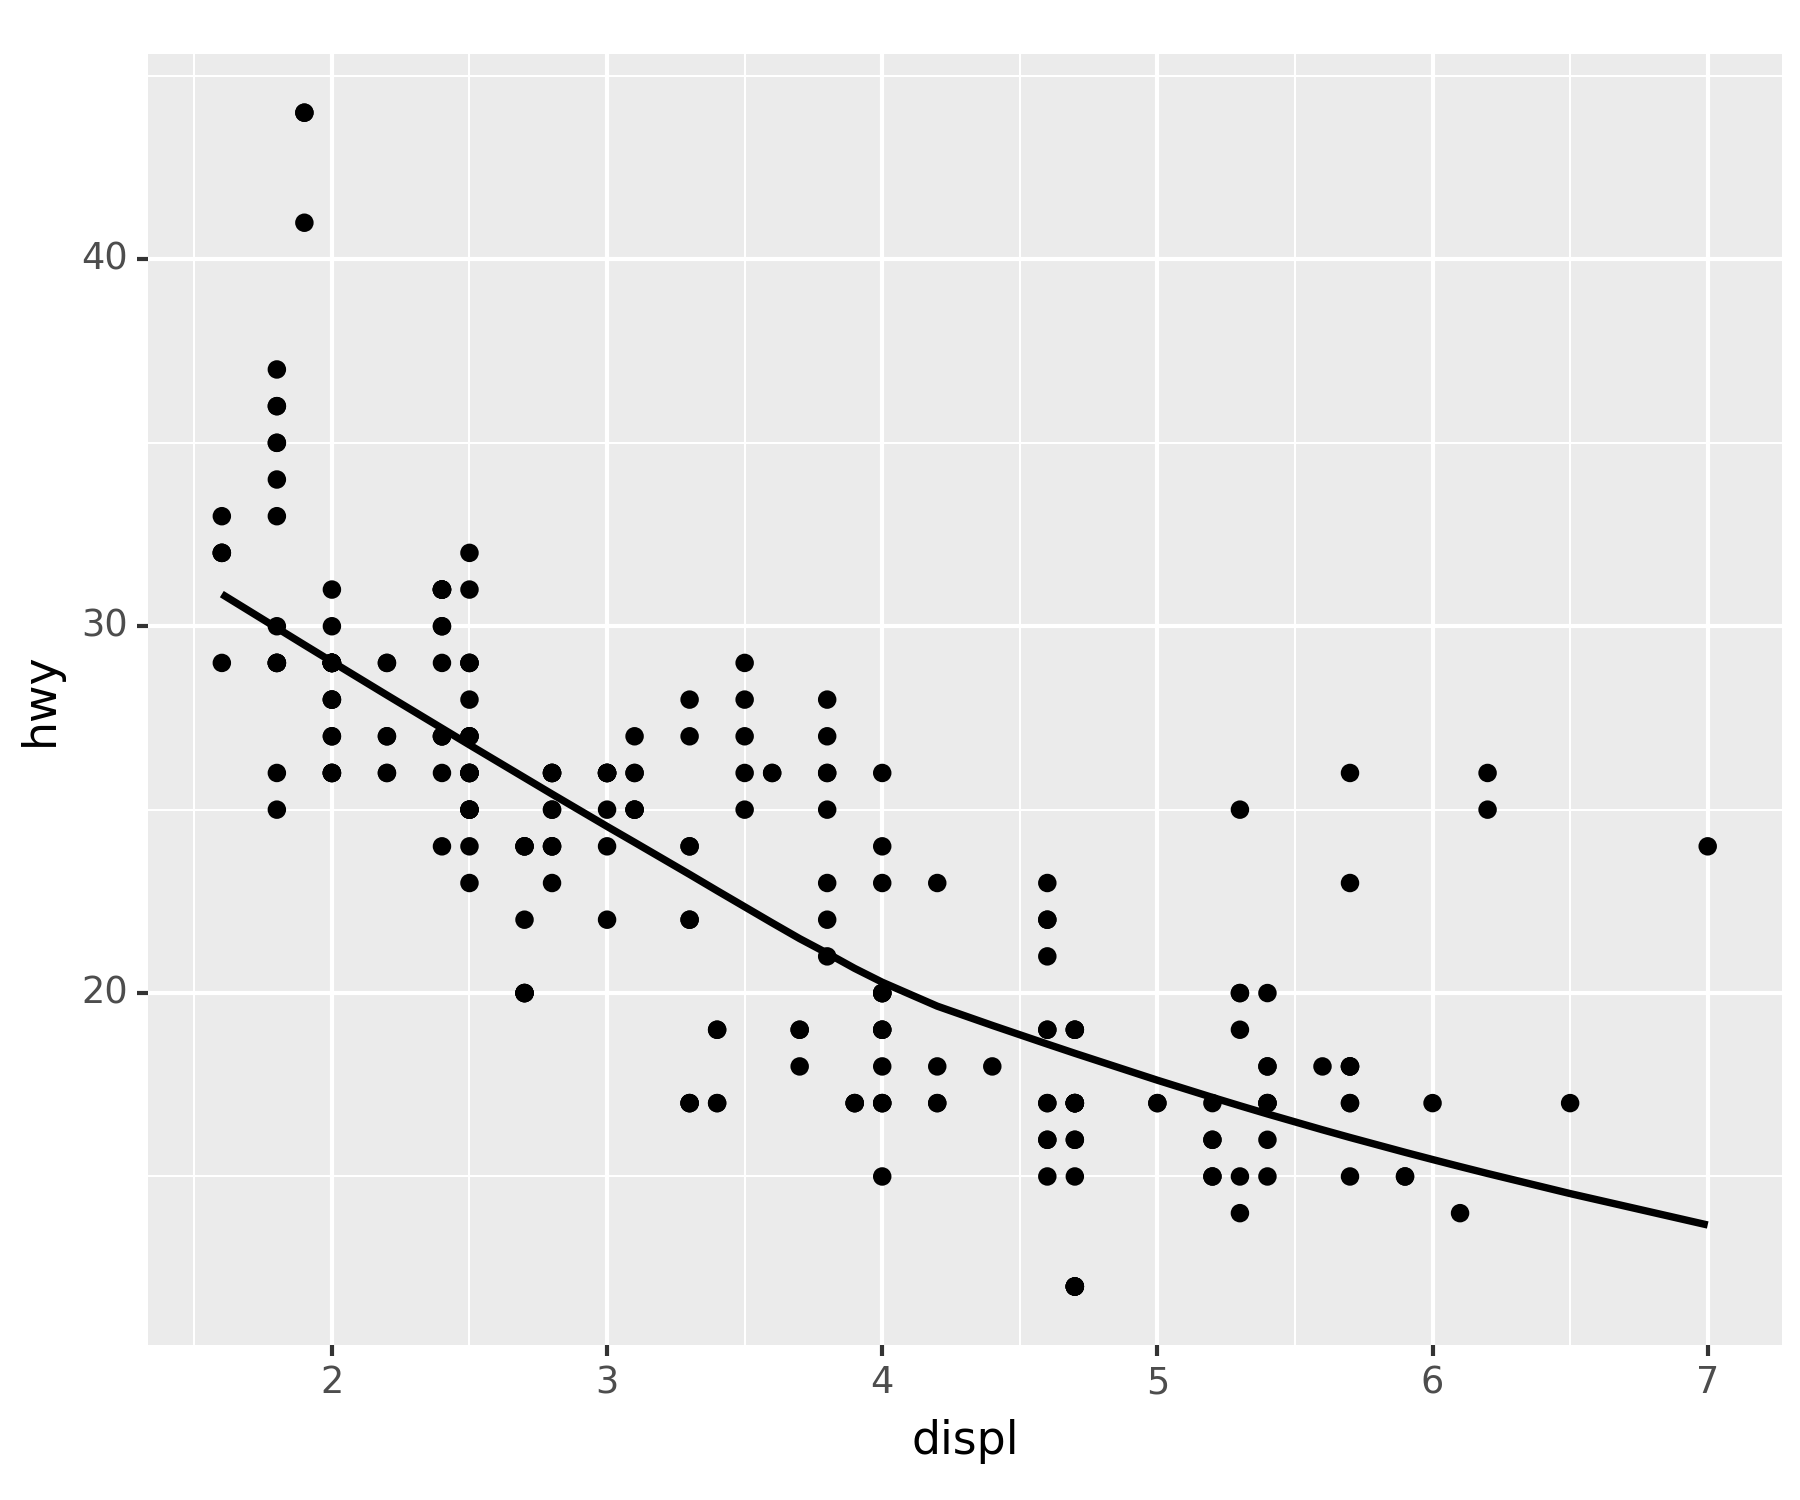

<Figure Size: (900 x 750)>

In [26]:
fig + point + smooth

`ggplot(df) + geom_point(aes(x = 'displ', y = 'hwy')) + geom_smooth(aes(x = 'displ', y = 'hwy'))`과 동일하다.

### **B. 시각화 개선**
---
* **`geom_point()`를 개선**

In [27]:
point_better = geom_point(aes(x='displ',y='hwy',color='drv',size='cyl'),alpha=0.5)  ## 색상과 크기로 구분

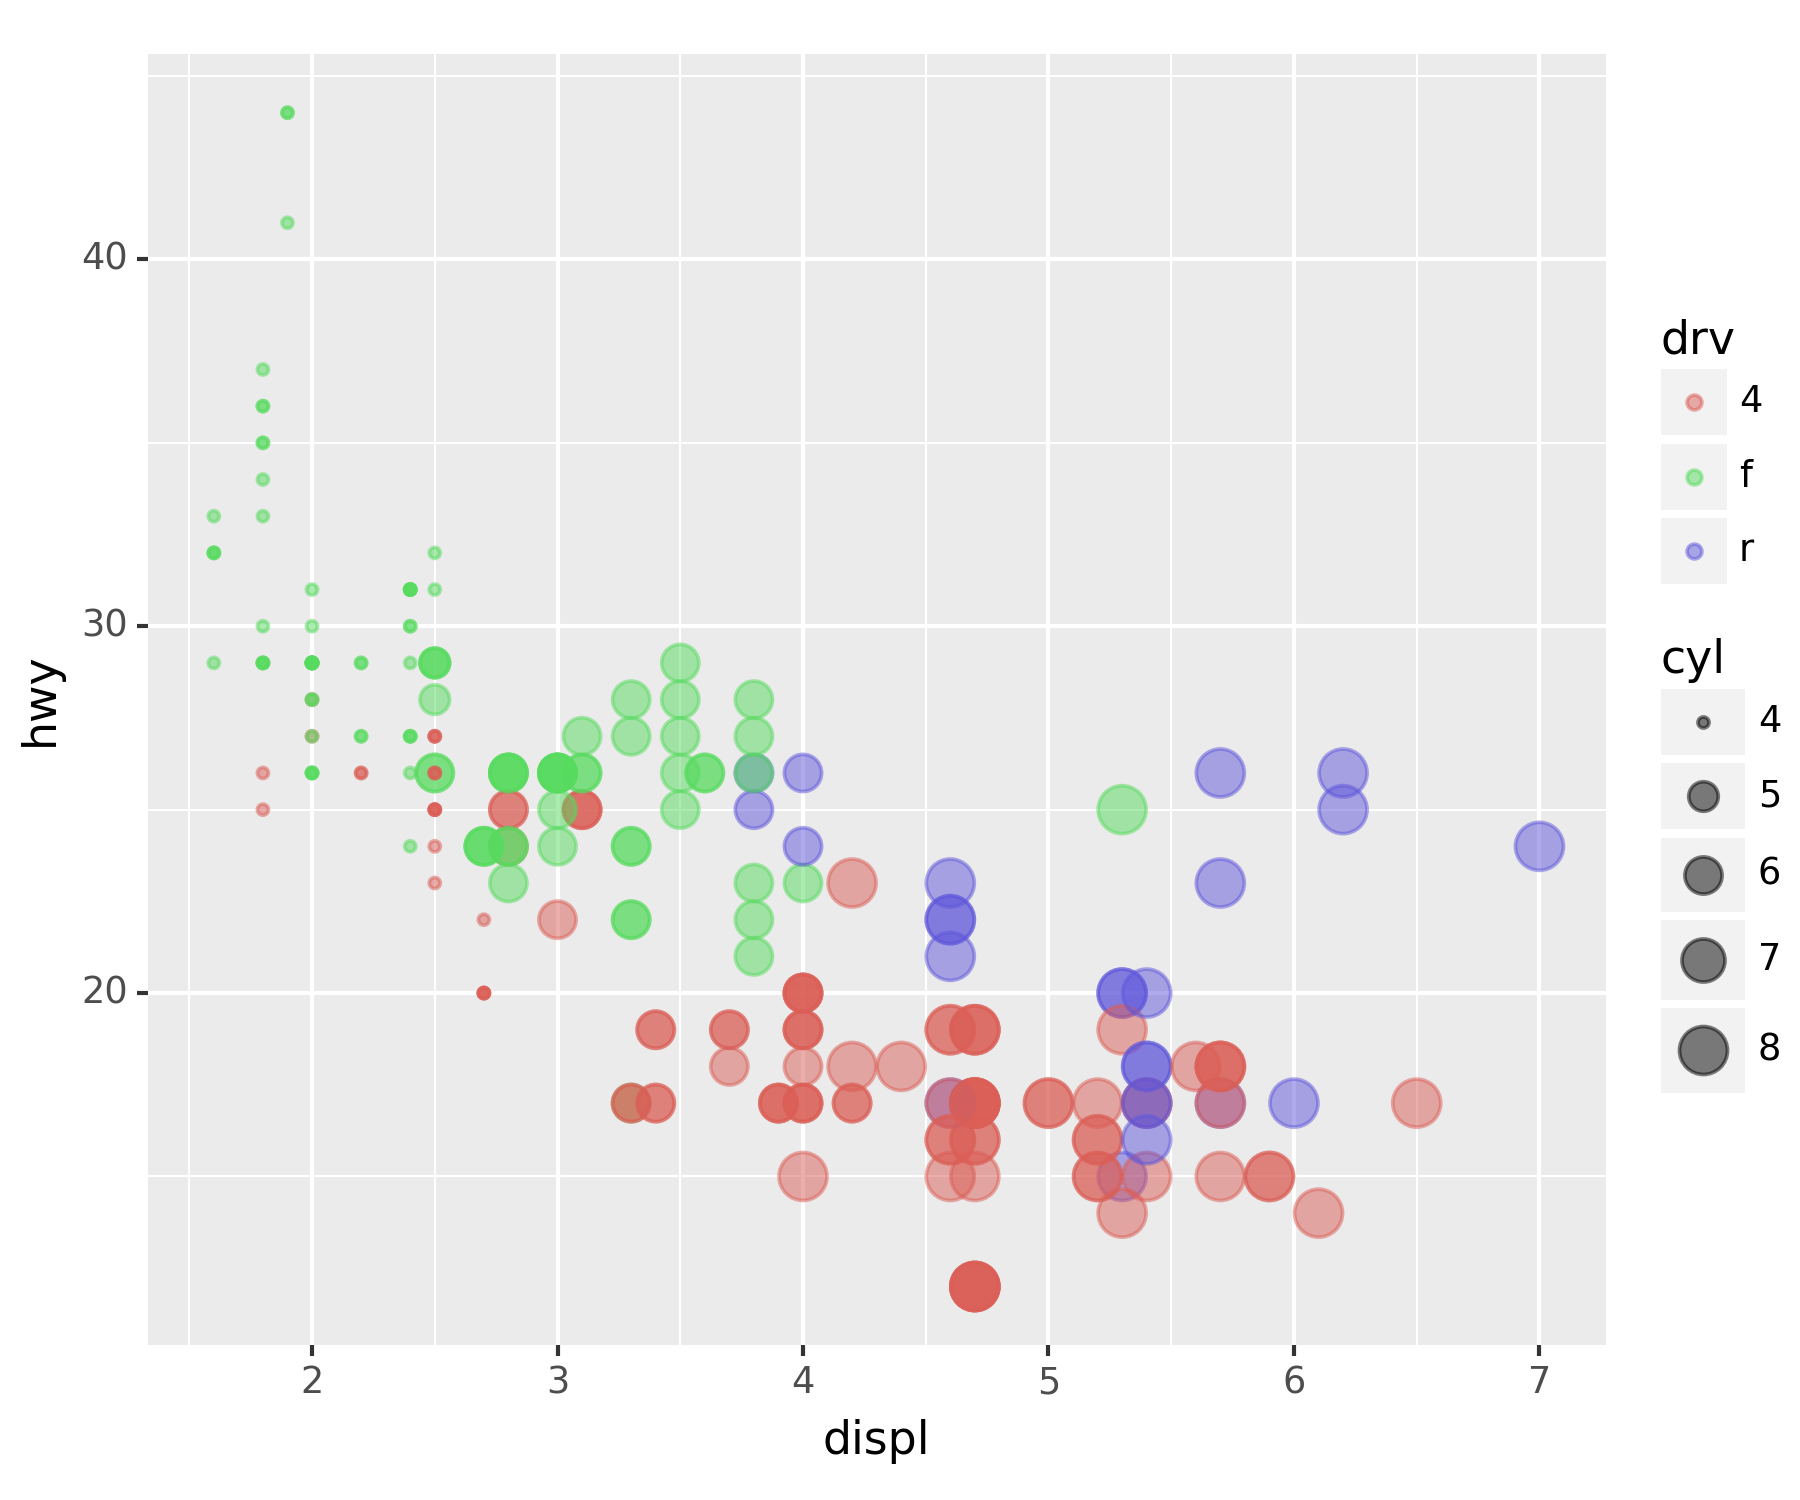

<Figure Size: (900 x 750)>

In [28]:
fig + point_better

* **```geom_smooth()``` 개선**

In [29]:
smooth_better = geom_smooth(aes(x = 'displ',  y = 'hwy', color = 'drv'), linetype = 'dashed')  ## 차종별로 추세선

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


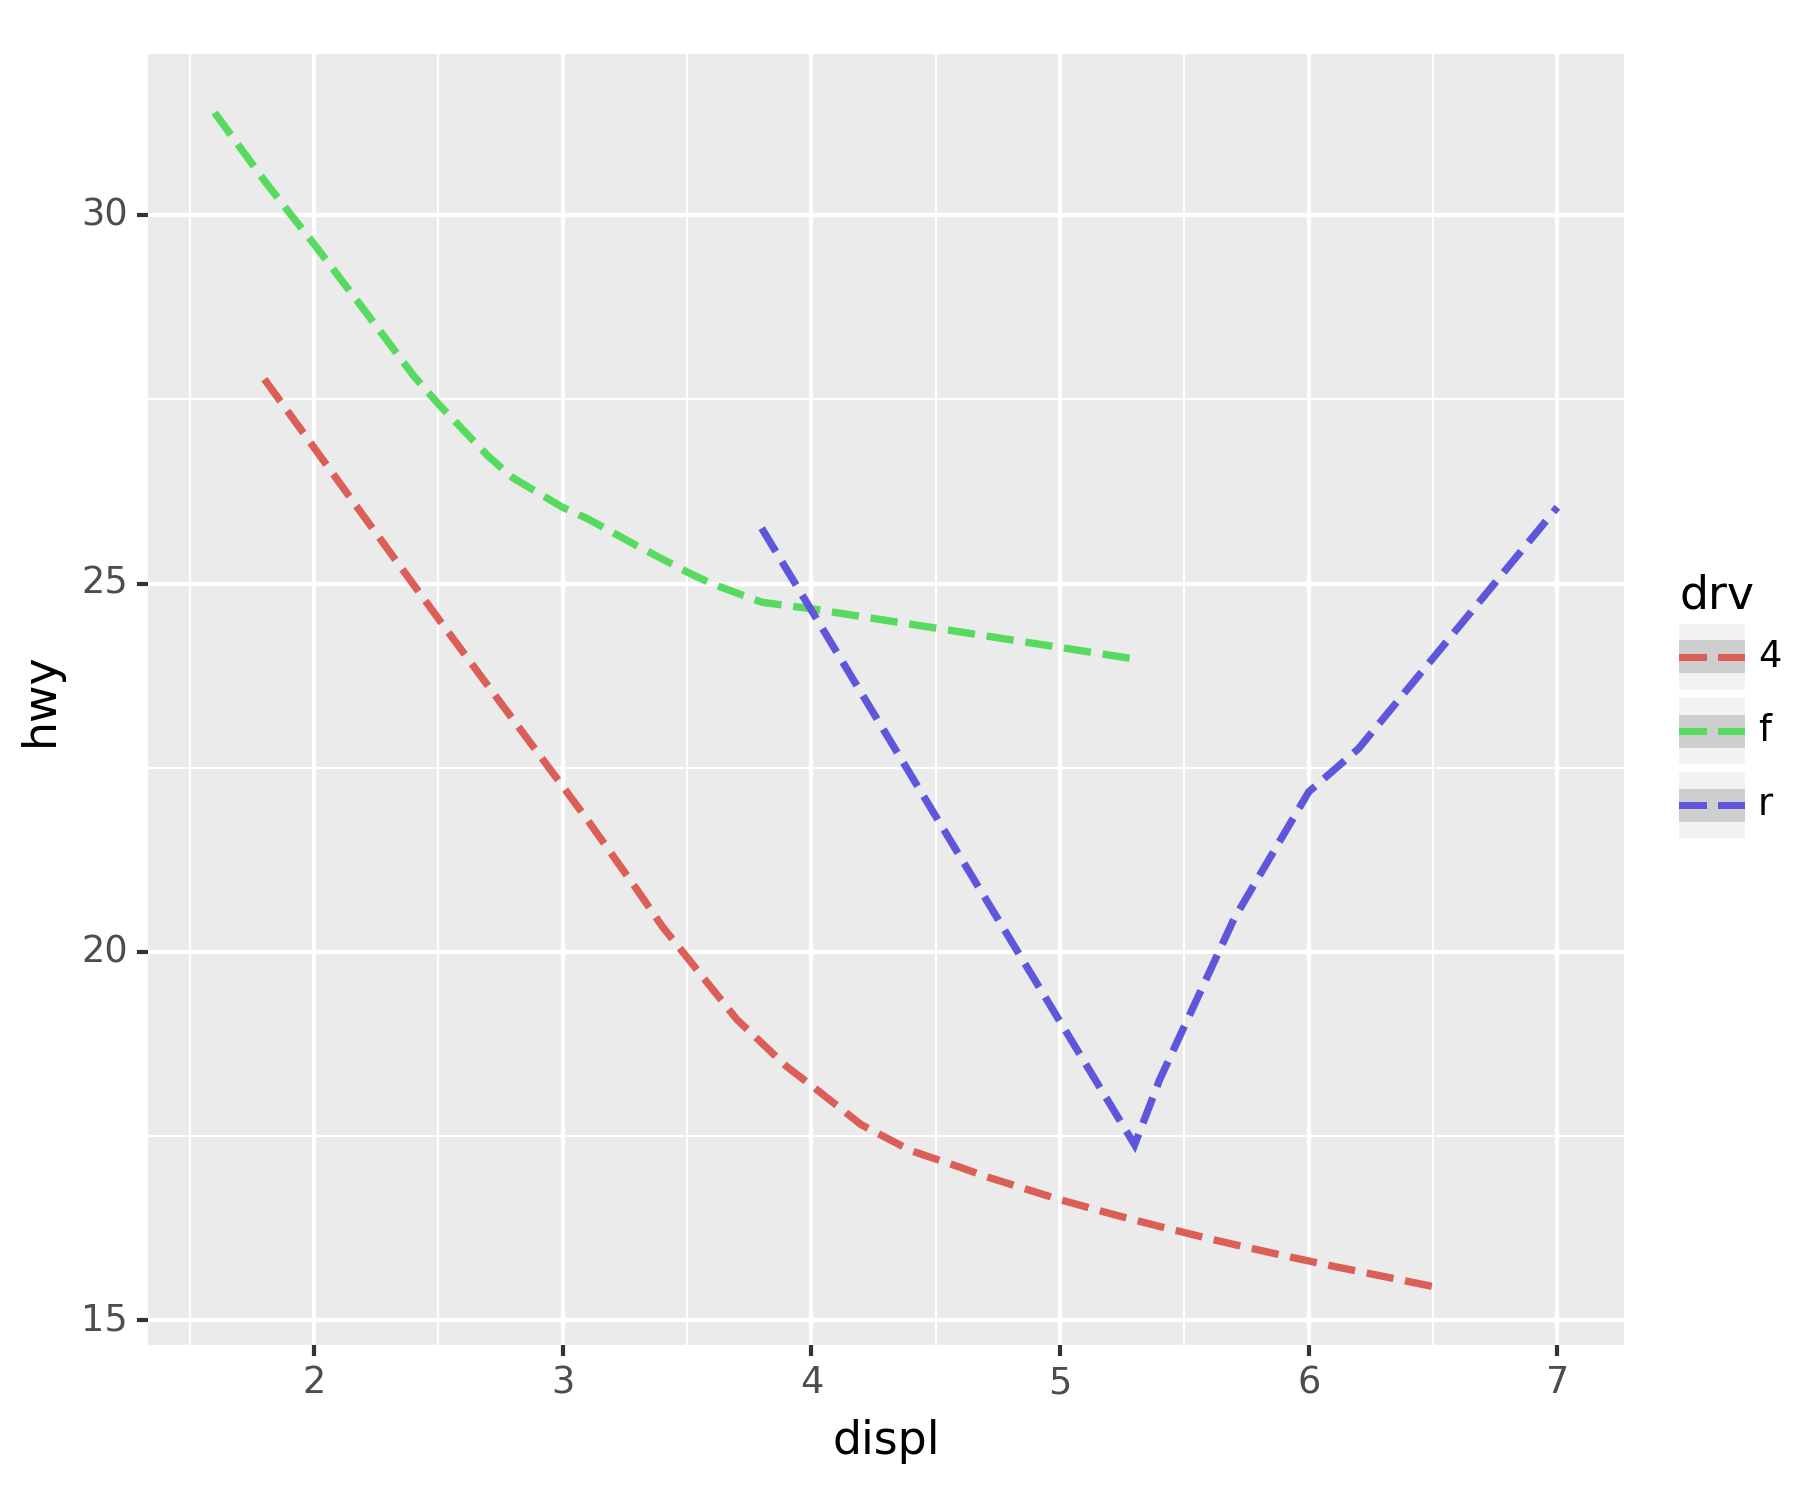

<Figure Size: (900 x 750)>

In [30]:
fig + smooth_better

* **assemble**

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


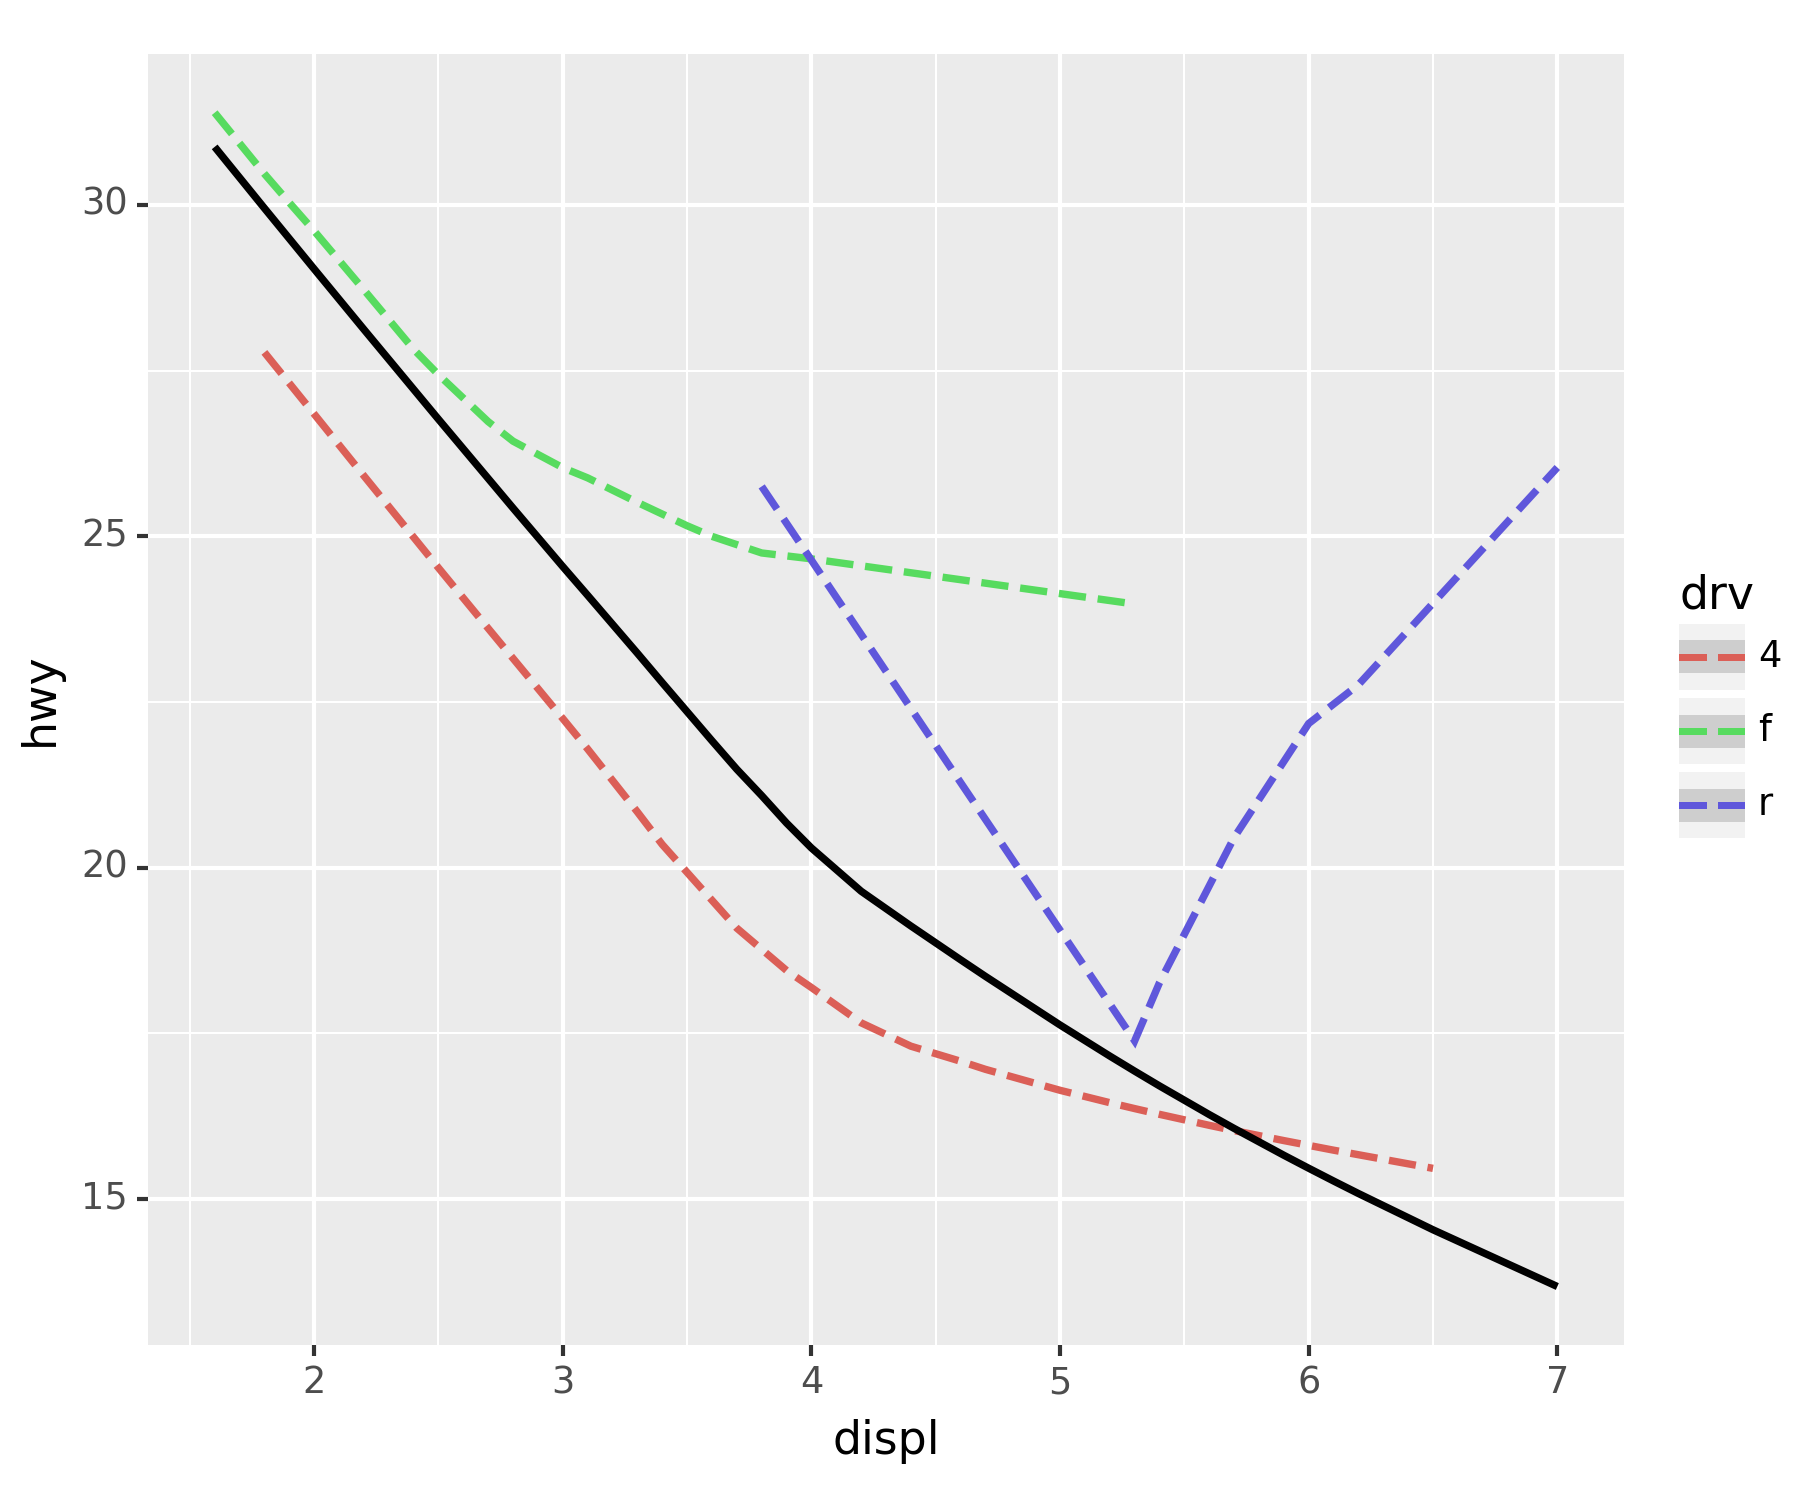

<Figure Size: (900 x 750)>

In [31]:
fig + smooth_better + smooth

### **C. 다양한 조합**
---

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


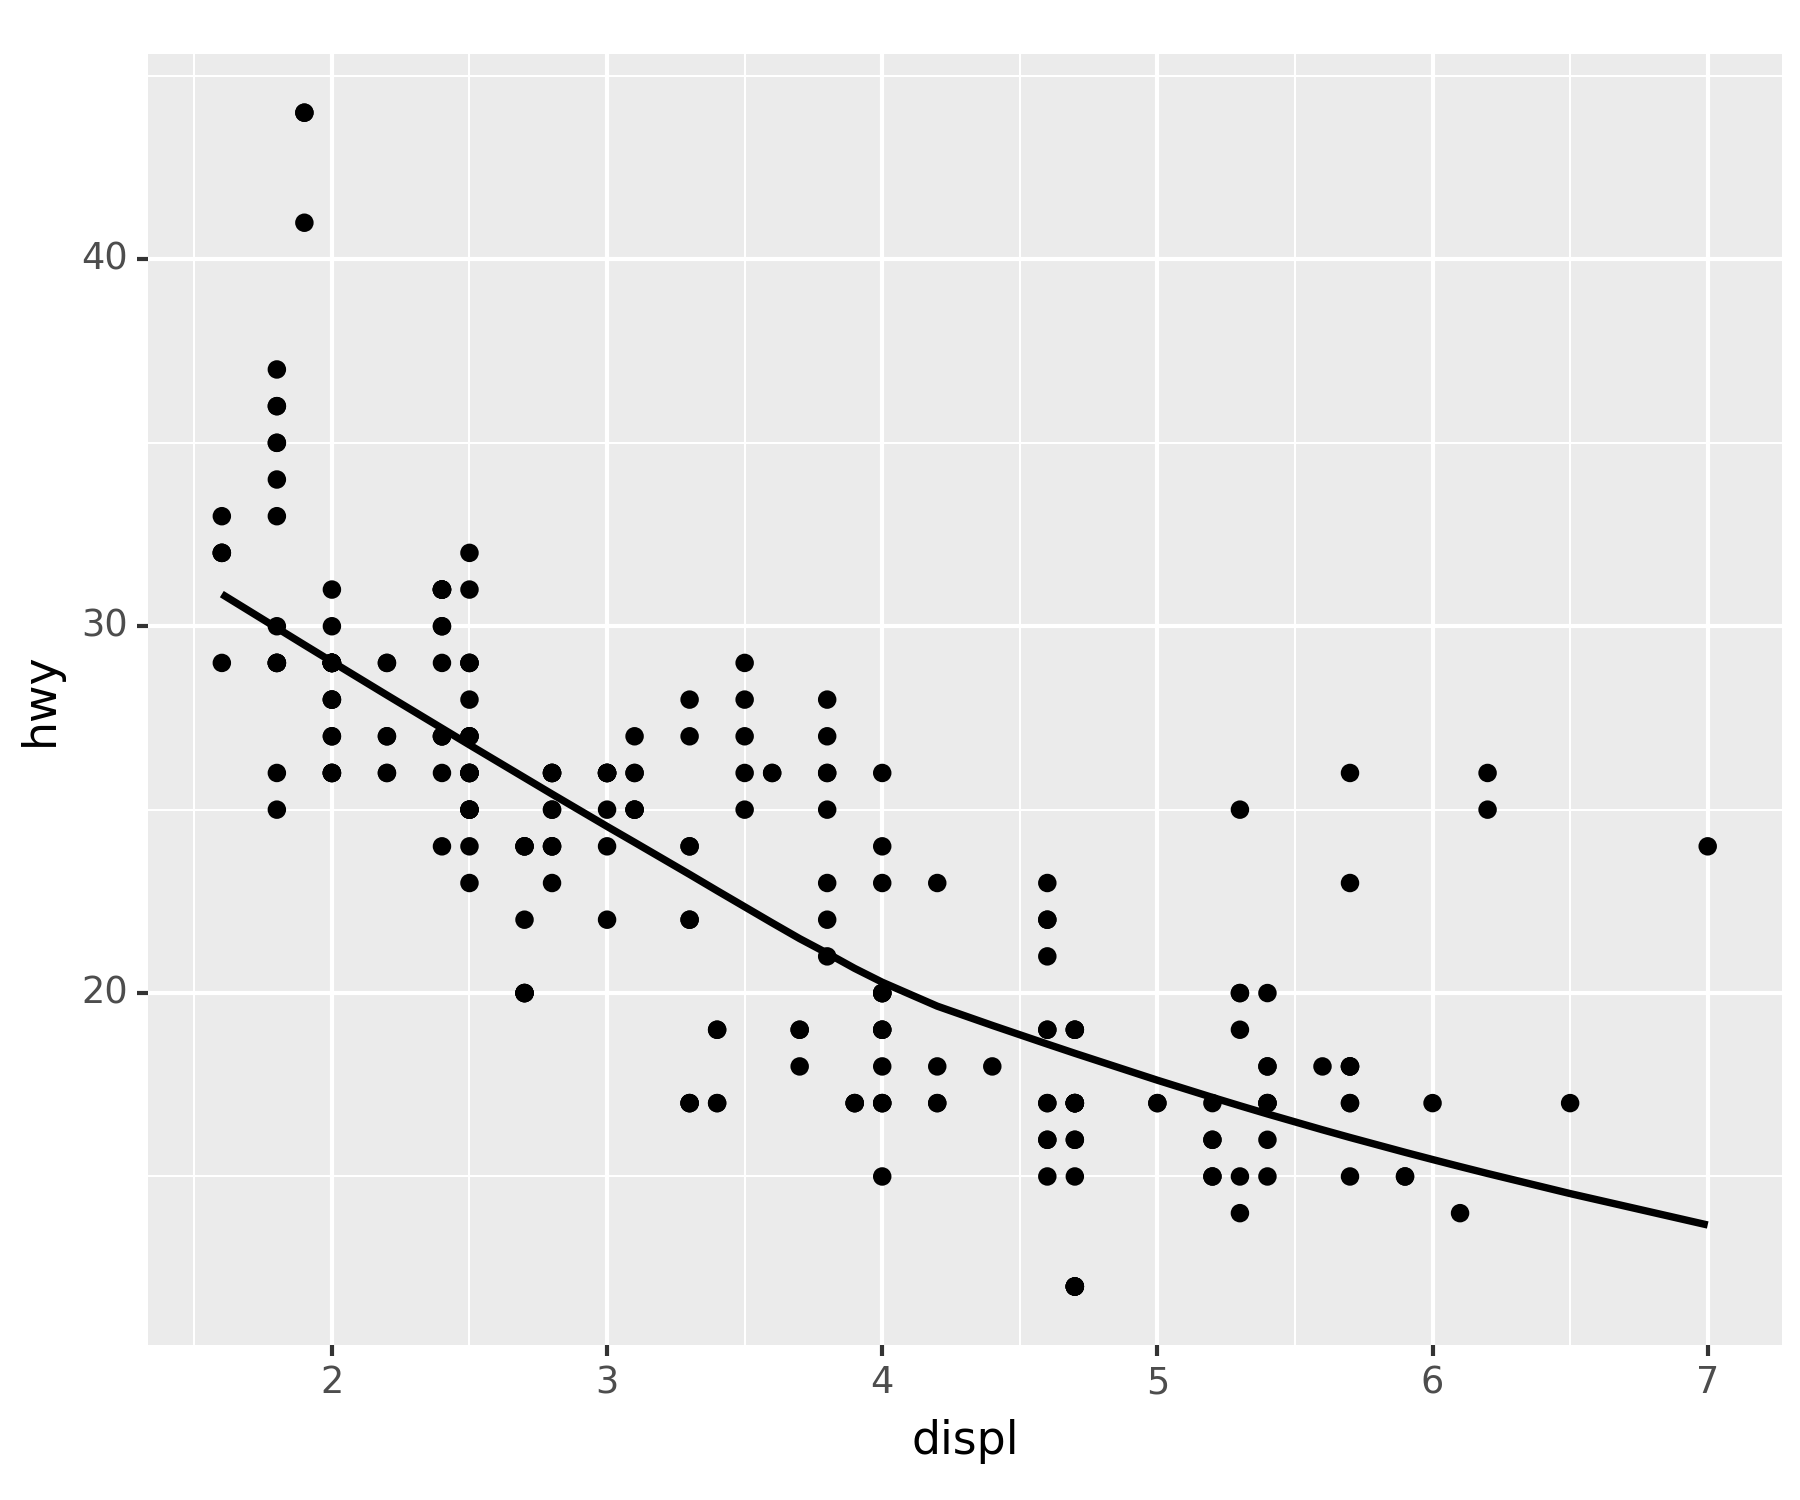

<Figure Size: (900 x 750)>

In [32]:
fig + point + smooth

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


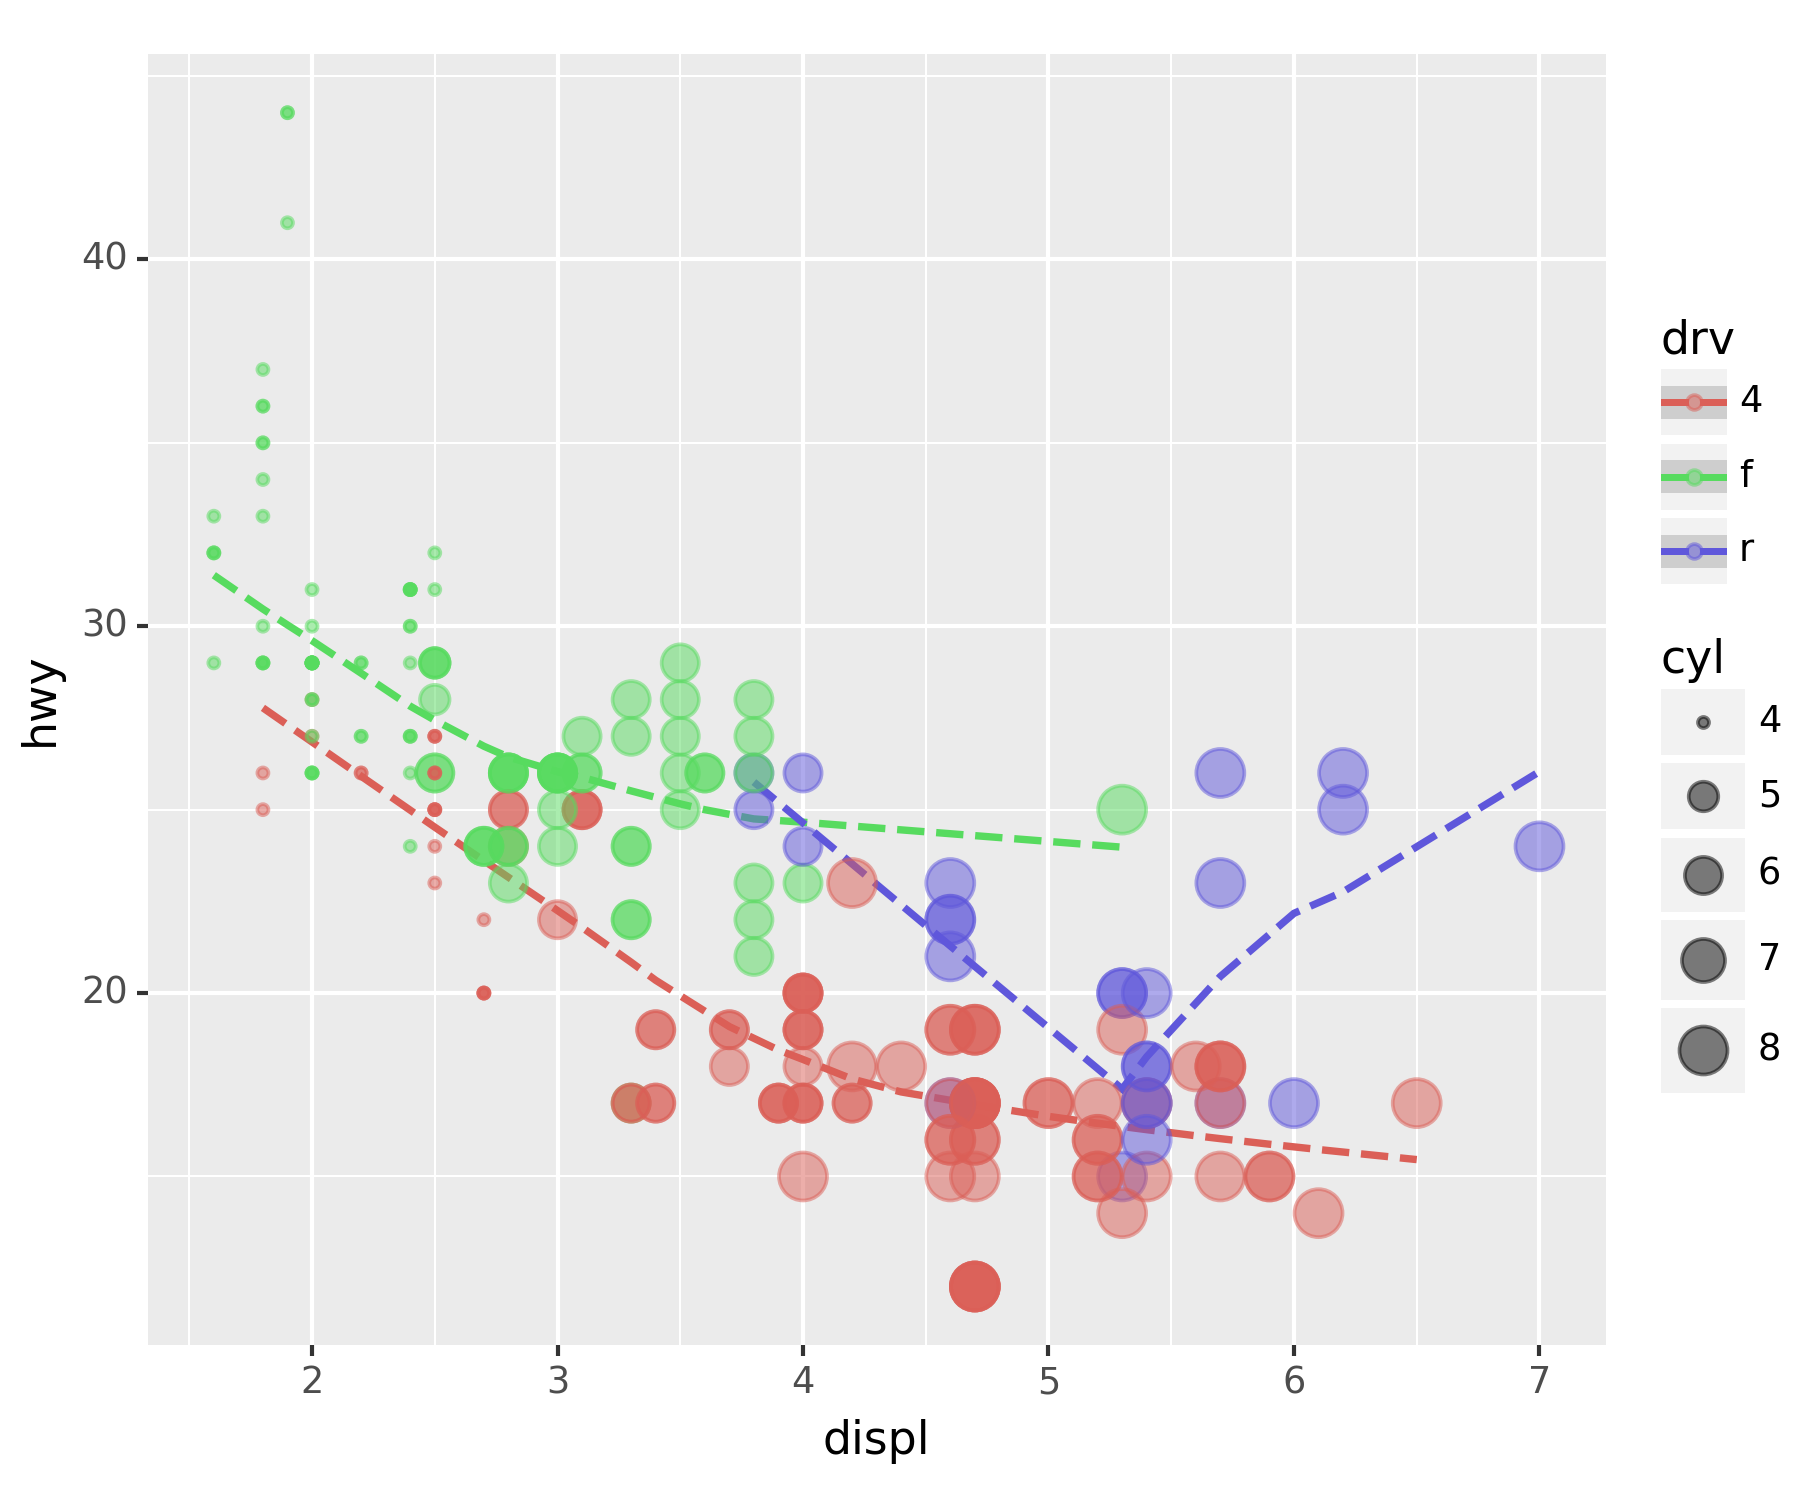

<Figure Size: (900 x 750)>

In [33]:
fig + smooth_better + point_better

* 전체 추세선 추가

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


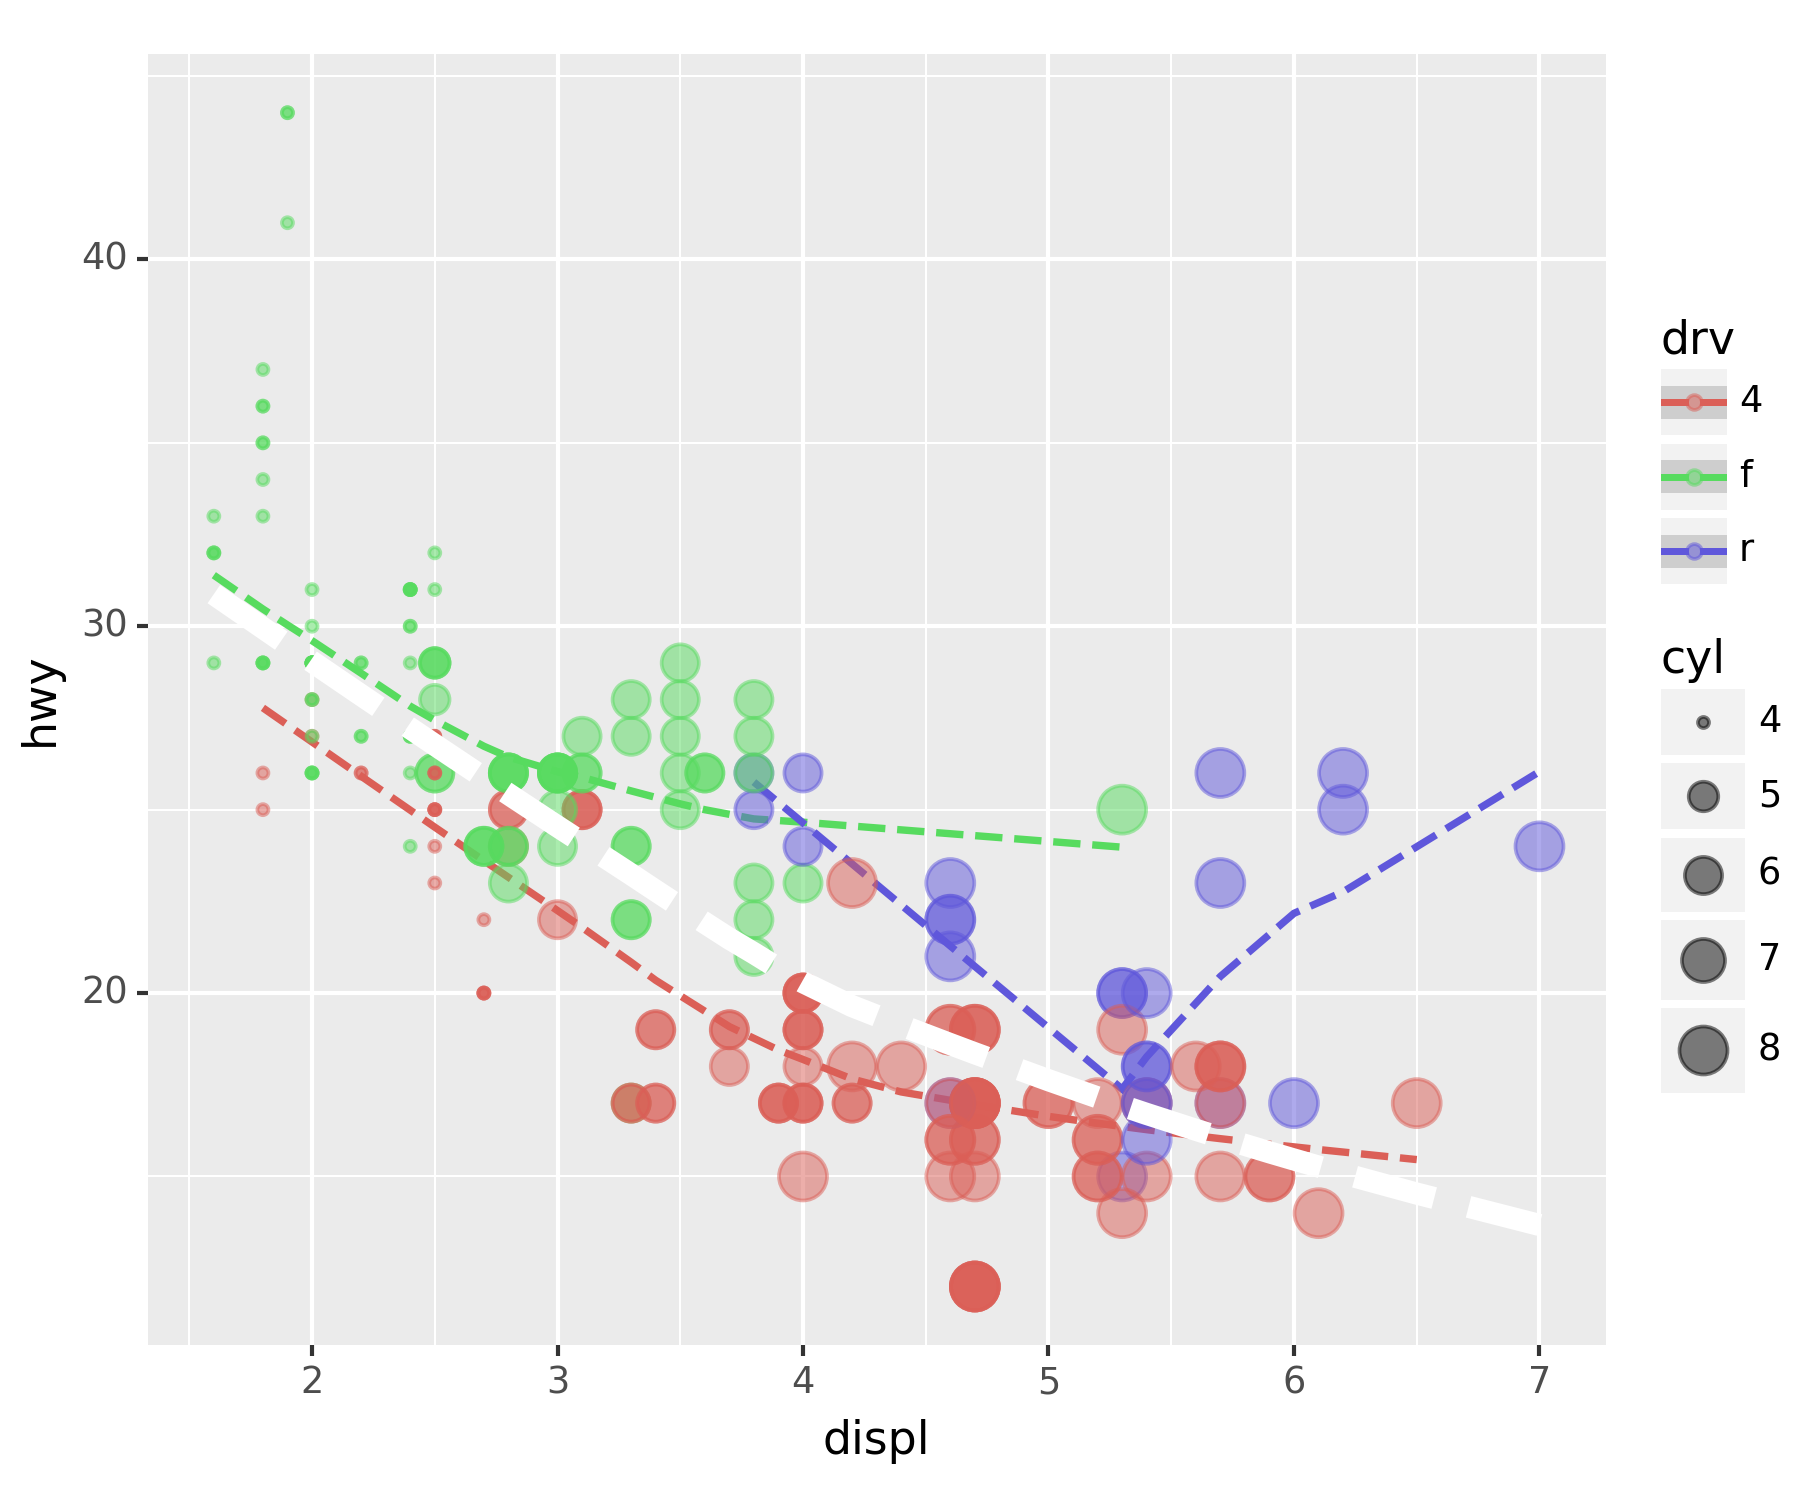

<Figure Size: (900 x 750)>

In [34]:
fig + smooth_better + point_better + geom_smooth(aes(x = 'displ', y = 'hwy'), color = 'white', linetype = 'dashed', size = 3)

## 7. 아이스크림을 많이 먹으면 걸리는 병 - 인과관계와 상관관계

### **A. 교회의 수와 범죄, 아이스크림과 소아마비**
---

||교회의 개수|범죄건수|
|-|-|-|
|전주|100|20|
|부산|1000|200|
|서울|5000|1000|

* 결론(?) : 교회가 많을 수록 범죄도 많아진다???

> 배경없이 숫자만 비교할 경우, 상관관계를 인과관계로 착각할 수도 있다.
>
> 인구에 대한 인과를 착각

```-``` 내용요약

* 여름 → 수영장 → 소아마비
* 여름 → 아이스크림
* 아이스크림과 소아마비는 상관관계가 높다. 따라서 아이스크림 성분 중에서 소아마비를 유발하는 유해물질이 있을 것이다(?)

> 다른 변인을 통제하고(인구가 동일한 지역), 비교하려는 대상만 차이를 부여해야 한다.

### **B. 기상자료**
---
\- 기상자료 다운로드

In [35]:
temp=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()
## 판다스 데이터의 4번째 열만 가져와 numpy.array로 만든다.

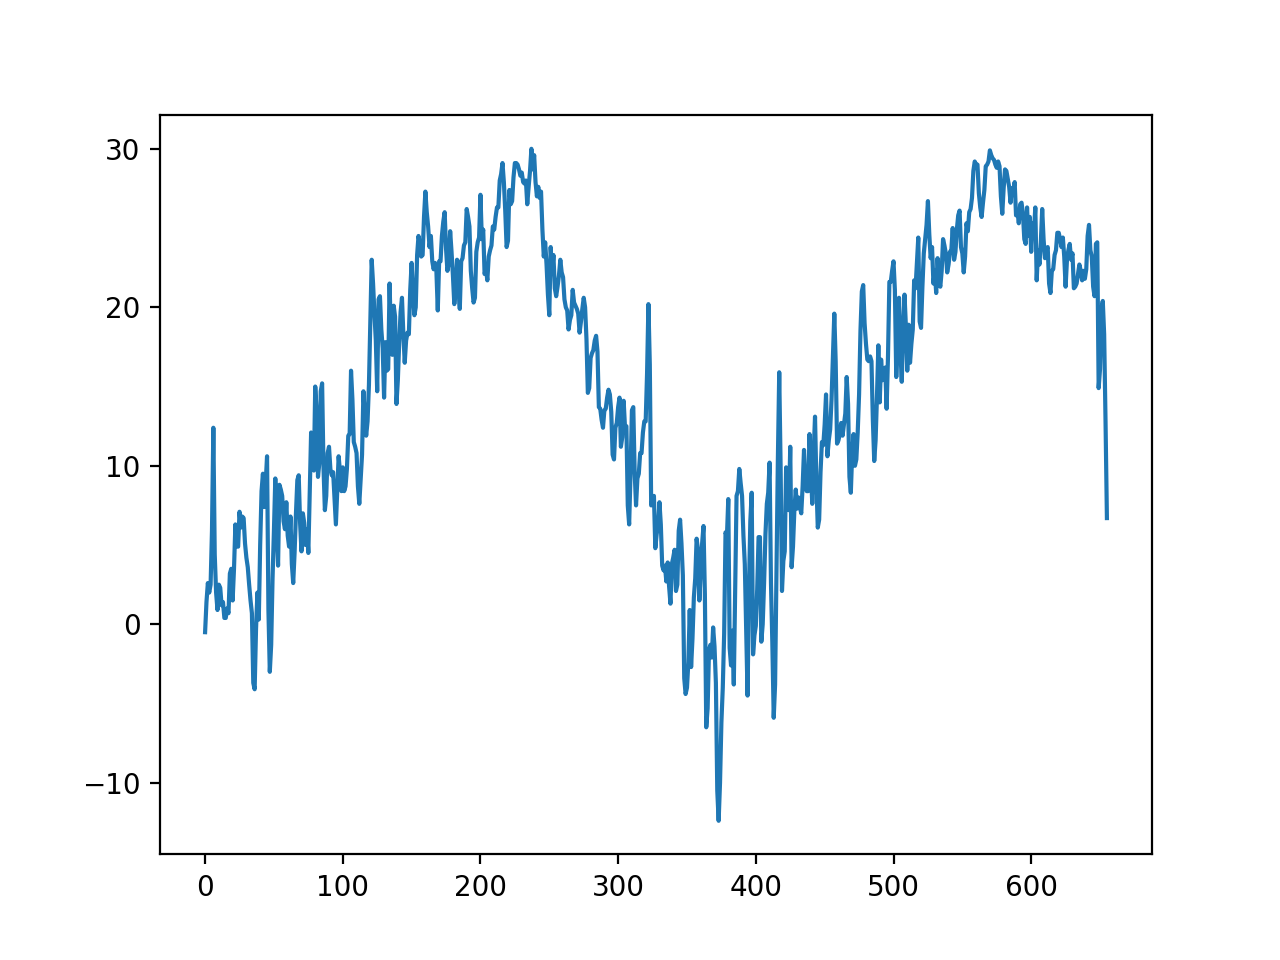

In [36]:
plt.plot(temp)    ## 이럴 때는 ggplot보다 matplotlib가 훨씬 편하다.
plt.show()

### **C. 숨은 진짜 상황 1 : 온도 -> 아이스크림 판매량**
---

```-```아래와 같은 관계를 가정하자.
$$\text{아이스크림 판매량} = 20 + 2 \times \text{온도} + \text{오차}$$

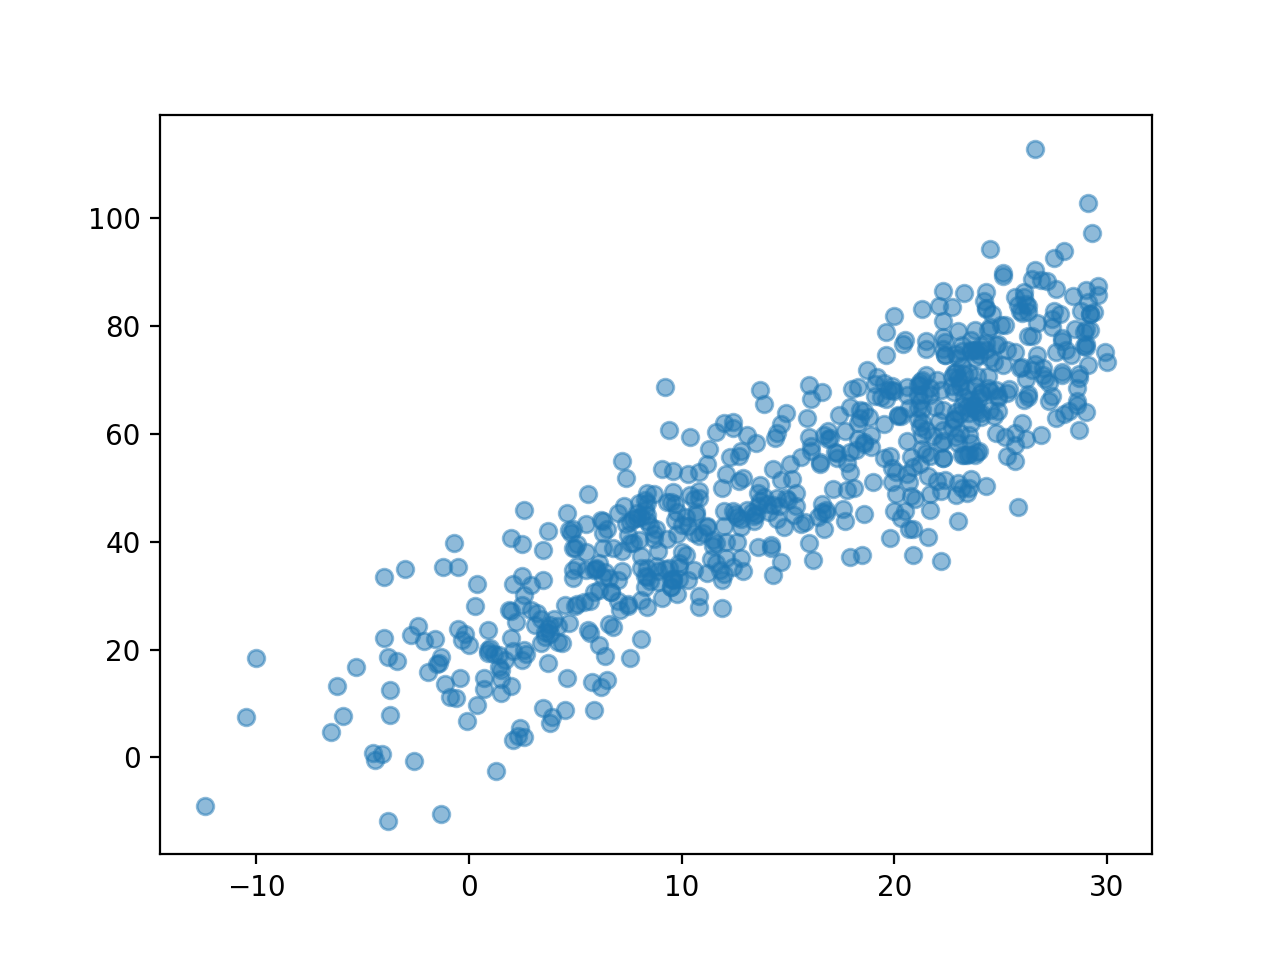

In [37]:
np.random.seed(1)   ## 결과가 같도록 시드 설정
icecream = 20 + 2 * temp + np.random.randn(len(temp))*10  ## N(0, 10^2)
plt.plot(temp, icecream, 'o', alpha = 0.5)
plt.show()

### **D. 숨은 진짜 상황 2 : 온도 -> 소아마비 반응수치**
---

`-` 아래와 같은 관계를 가정하자.
$$\text{소아마비 반응수치} = 30 + 0.5 \times \text{온도} + \text{오차}$$

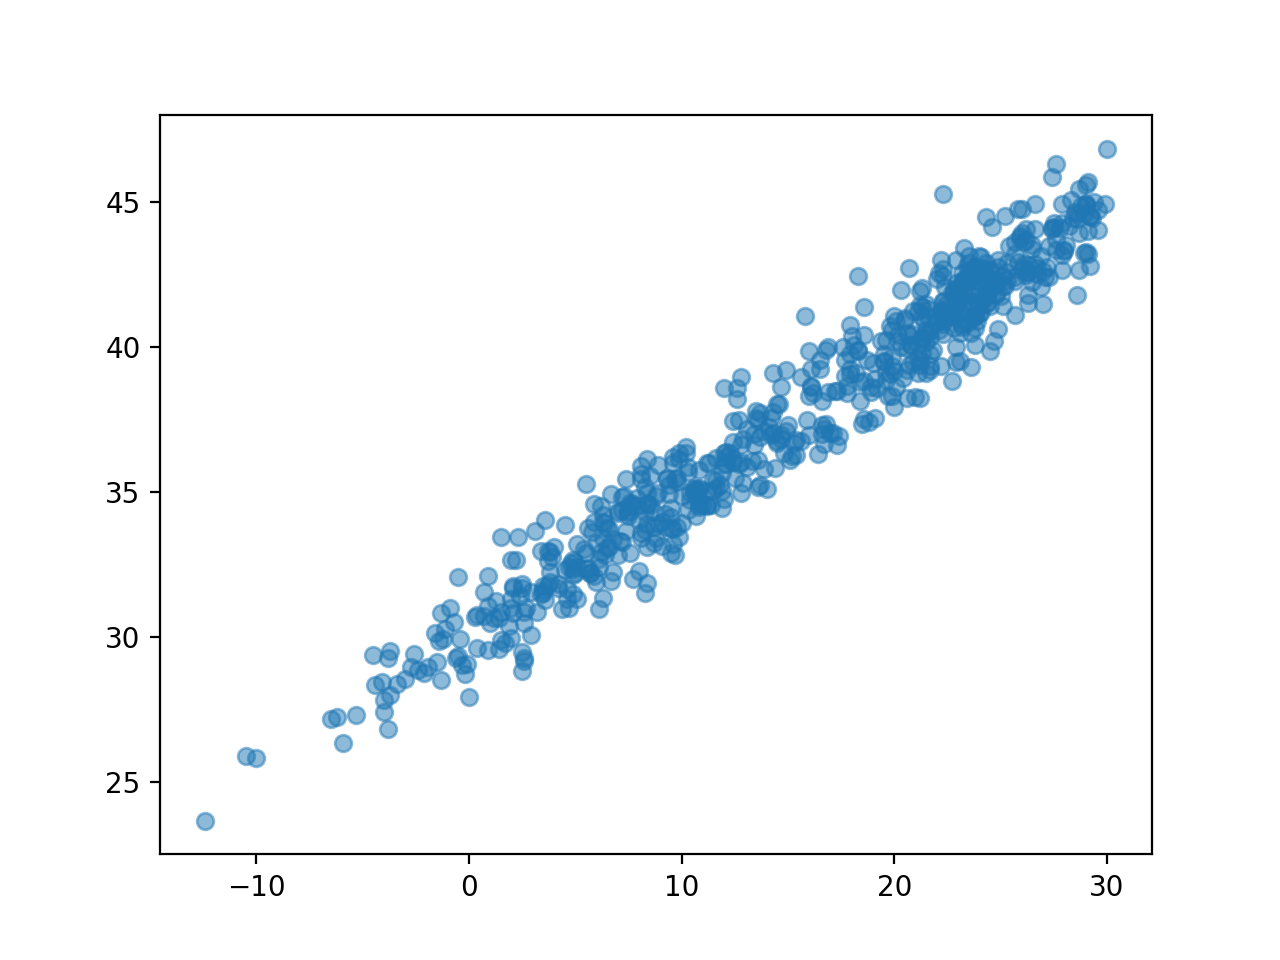

In [38]:
np.random.seed(2)

disease = 30 + 0.5 * temp + np.random.randn(len(temp))*1  ## N(0,1)
plt.plot(temp, disease, 'o', alpha = 0.5)
plt.show()

### **E. 우리가 관측한 상황**(온도는 은닉되어 있음)
---

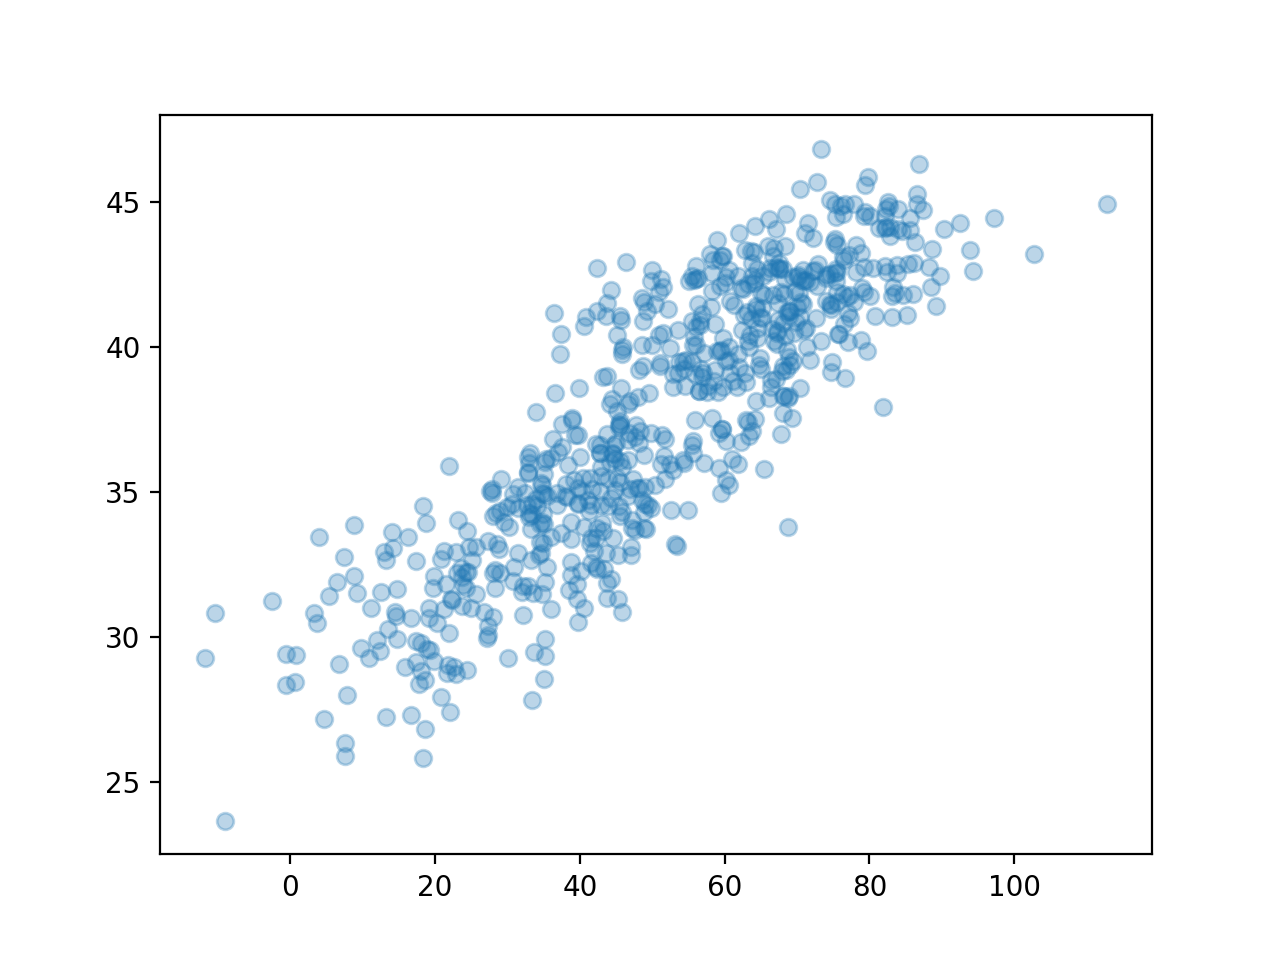

In [39]:
plt.plot(icecream, disease, 'o', alpha=0.3)
plt.show()

In [40]:
np.corrcoef(icecream,disease)

array([[1.        , 0.86298975],
       [0.86298975, 1.        ]])

**여름만 뽑아서 플랏한다면?**

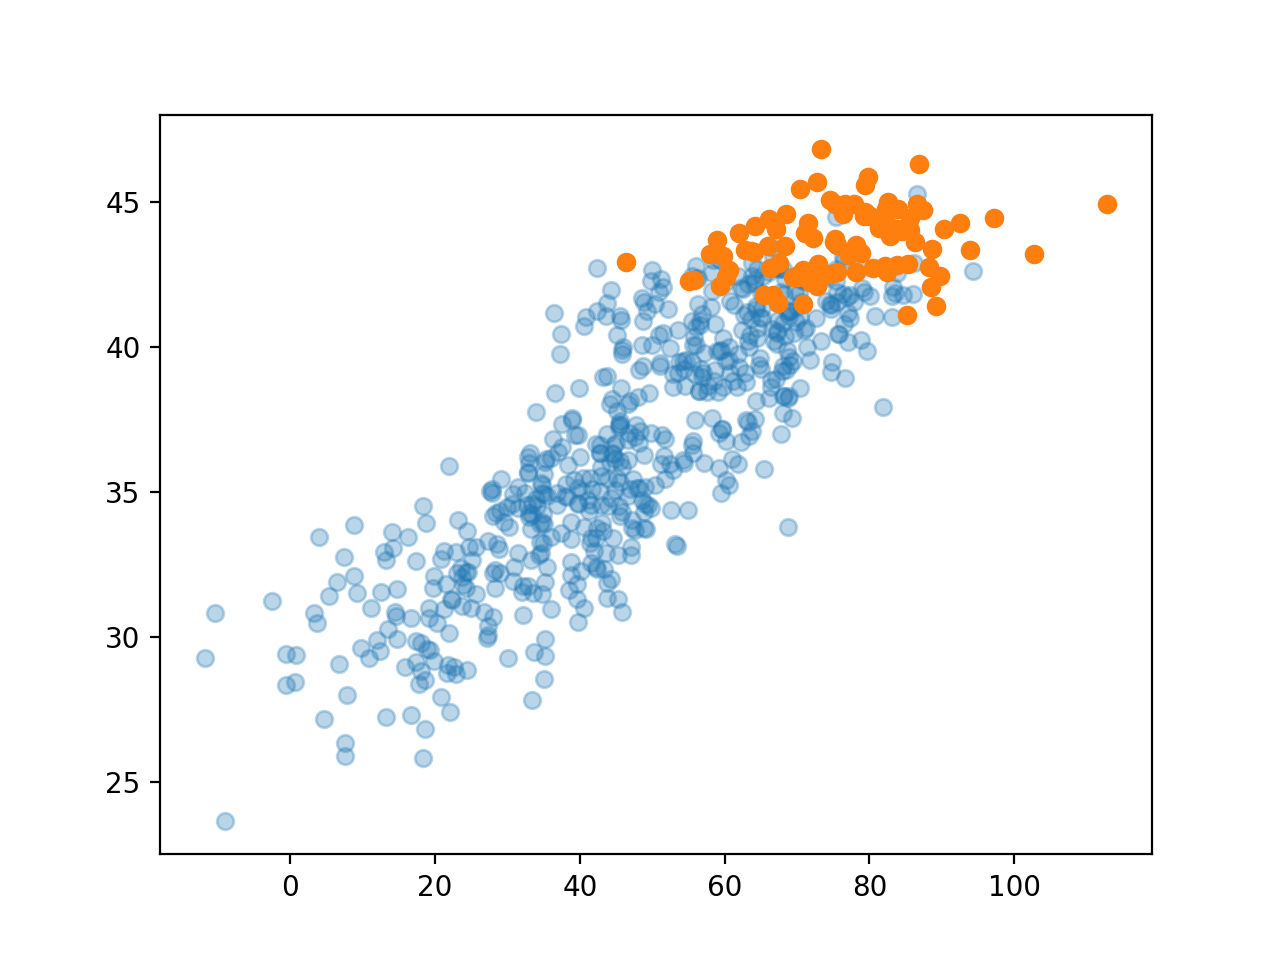

In [41]:
plt.plot(icecream,disease,'o',alpha=0.3)
plt.plot(icecream[temp>25], disease[temp>25],'o') ## 기온이 25도 이상, 즉, 여름(아마도)
plt.show()

### **F. ```ggplot```으로 온도구간을 세분화하여 시각화하자.**
---

\- 데이터를 데이터프레임으로

In [42]:
df = pd.DataFrame({'temp' : temp, 'ice' : icecream, 'dis' : disease})
df

temp        ice        dis
0    -0.5  35.243454  29.333242
1     1.4  16.682436  30.643733
2     2.6  19.918282  29.163804
3     2.0  13.270314  32.640271
4     2.5  33.654076  29.456564
..    ...        ...        ...
651  19.9  68.839992  39.633906
652  20.4  76.554679  38.920443
653  18.3  68.666079  39.882650
654  12.8  42.771364  36.613159
655   6.7  30.736731  34.902513

[656 rows x 3 columns]

\- 구간별로 나눈 변수를 추가 : `pd.cut(df, bins = int)`

In [43]:
df.assign(temp_cut = pd.cut(df.temp, bins = 5))   ## 온도를 4구간으로 분할한다

temp        ice        dis        temp_cut
0    -0.5  35.243454  29.333242   (-3.92, 4.56]
1     1.4  16.682436  30.643733   (-3.92, 4.56]
2     2.6  19.918282  29.163804   (-3.92, 4.56]
3     2.0  13.270314  32.640271   (-3.92, 4.56]
4     2.5  33.654076  29.456564   (-3.92, 4.56]
..    ...        ...        ...             ...
651  19.9  68.839992  39.633906  (13.04, 21.52]
652  20.4  76.554679  38.920443  (13.04, 21.52]
653  18.3  68.666079  39.882650  (13.04, 21.52]
654  12.8  42.771364  36.613159   (4.56, 13.04]
655   6.7  30.736731  34.902513   (4.56, 13.04]

[656 rows x 4 columns]

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are

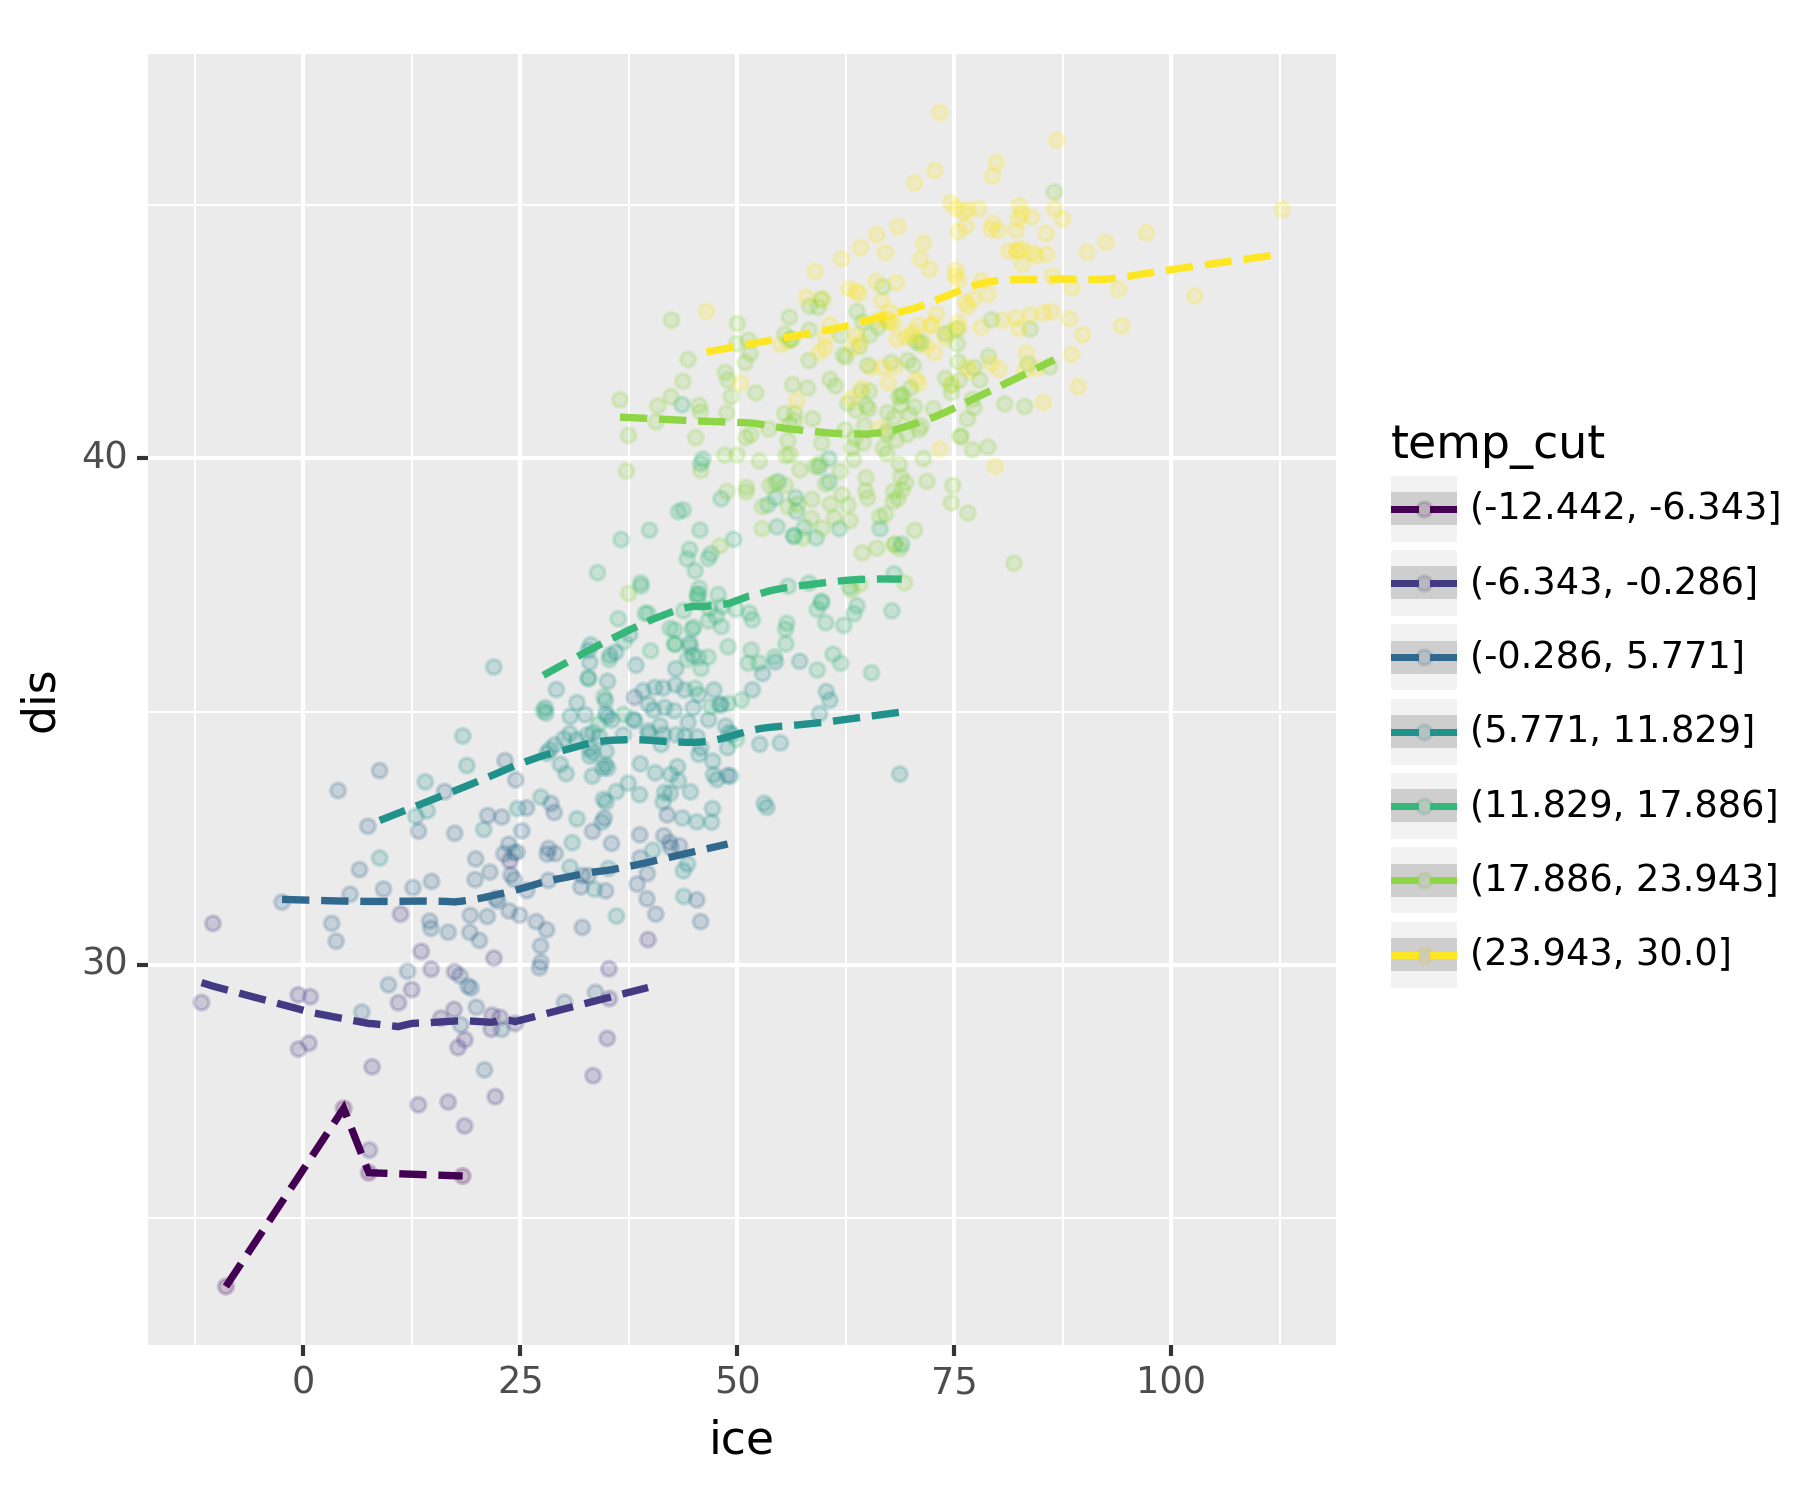

<Figure Size: (900 x 750)>

In [44]:
cut_df = df.assign(temp_cut = pd.cut(df.temp, bins = 7))

fig = ggplot(cut_df)
point = geom_point(aes(x = 'ice', y = 'dis', color = 'temp_cut'), alpha = 0.2)
smooth = geom_smooth(aes(x = 'ice', y = 'dis', color = 'temp_cut'), linetype = 'dashed')

fig + point + smooth

> 실제로 보니 상관관계가 없어보인다.

### 진짜 아이스크림을 먹고 배탈이 났다면?

In [45]:
np.random.seed(1)
icecream_sales = 30 + 2 * temp + np.random.randn(len(temp))*10

In [46]:
np.random.seed(2)
disease = 30 + 0 * temp + 0.15 * icecream + np.random.randn(len(temp))*1  ## temp, 온도가 미치는 영향을 제로로

In [47]:
df2 = pd.DataFrame({'temp' : temp, 'ice' : icecream_sales, 'dis' : disease})
df2.assign(temp_cut = pd.cut(df2.temp, bins = 7))

temp        ice        dis          temp_cut
0    -0.5  45.243454  34.869760  (-6.343, -0.286]
1     1.4  26.682436  32.446099   (-0.286, 5.771]
2     2.6  29.918282  30.851546   (-0.286, 5.771]
3     2.0  23.270314  33.630818   (-0.286, 5.771]
4     2.5  43.654076  33.254676   (-0.286, 5.771]
..    ...        ...        ...               ...
651  19.9  78.839992  40.009905  (17.886, 23.943]
652  20.4  86.554679  40.203645  (17.886, 23.943]
653  18.3  78.666079  41.032562  (17.886, 23.943]
654  12.8  52.771364  36.628863  (11.829, 17.886]
655   6.7  40.736731  36.163023   (5.771, 11.829]

[656 rows x 4 columns]

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are

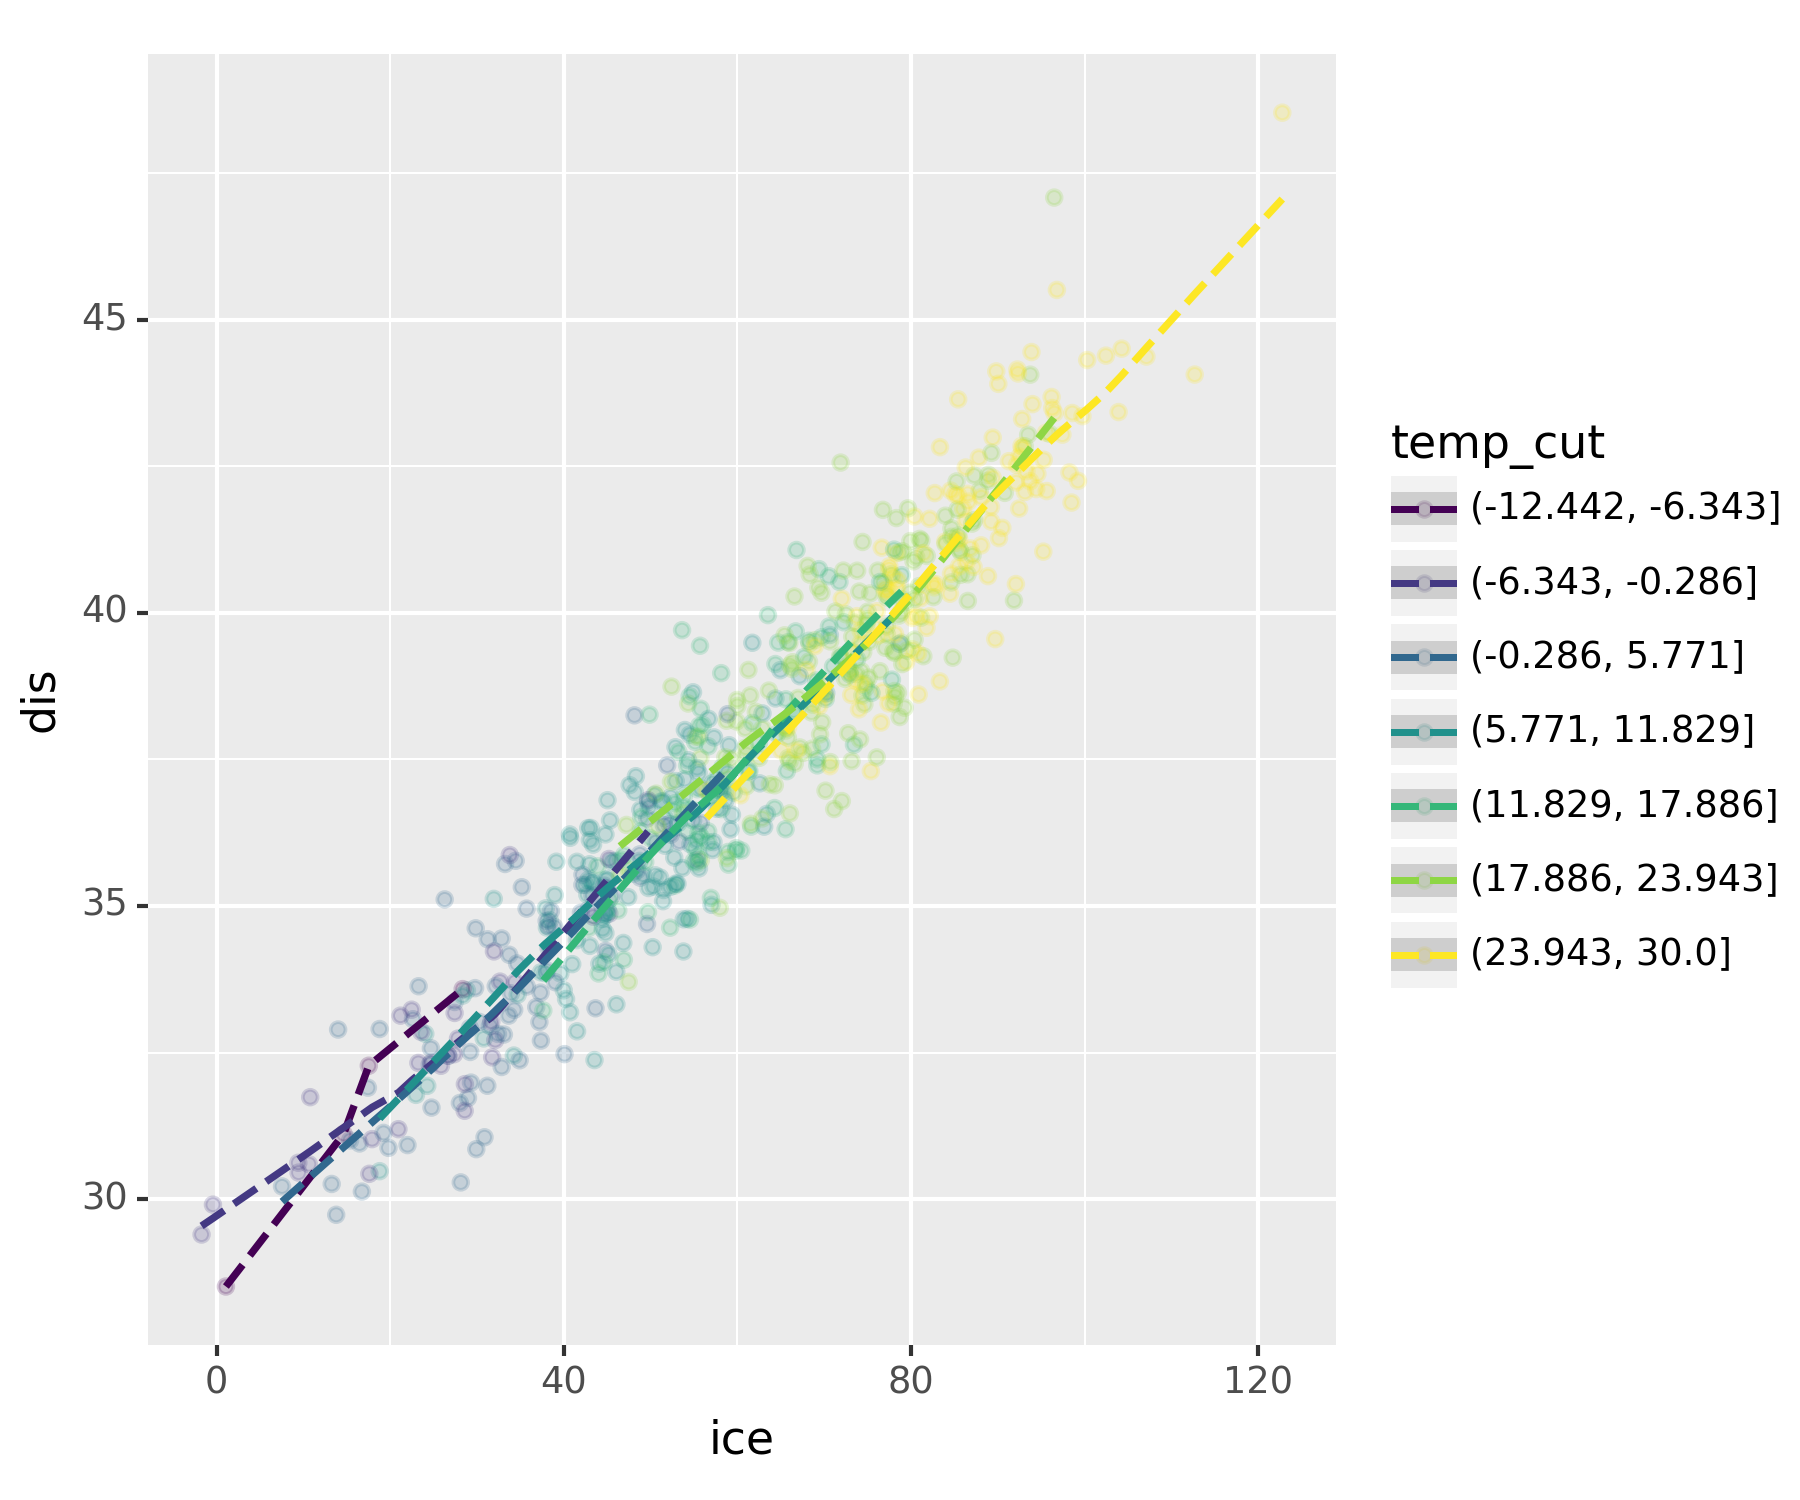

<Figure Size: (900 x 750)>

In [48]:
fig = ggplot(df2.assign(temp_cut = pd.cut(df2.temp,bins=7)))
point = geom_point(aes(x='ice',y='dis',color='temp_cut'),alpha=0.2)
smooth = geom_smooth(aes(x='ice',y='dis',color='temp_cut'),linetype='dashed')
fig + point + smooth

> 무친 인과관계

## 8. 결론

> 아이스크림 먹어도 소아마비 안걸려!


* 온도라는 흑막(<span style=background-color:#ffff00;>은닉변수</span>)을 잘 찾았고, 결과적으로 온도 -> 아이스크림 판매량 & 소아마비라는 합리적인 진리를 얻을 수 있었다.

> 고려할 흑막이 온도뿐이라는 보장이 있나?

* **이론적으로는 모든 은닉변수들을 통제하였을 경우에도 corr(X,Y)의 절댓값이 1에 가깝다면 그때는 인과성이 있음이라고 주장할 수 있다.(이 경우에도 둘 중 어느것이 원인인지 파악하는 것은 불가)**

* **즉, 모든 은닉변수를 제거하면 상관성 = 인과성이다.**

> 모든 흑막을 제거하는 건 사실상 불가능하지 않나?

* 실험계획을 잘 하면 흑막을 제거한 효과가 있음(무작위 추출 등)

* 인과추론 : 실험계획이 사실상 불가능한 경우가 있음 -> 모인 데이터에서 최대한 흑막2ㆍ3ㆍ4ㆍㆍㆍ등이 비슷한 그룹끼리 "매칭"을 시킨 뒤, 그룹간 corr을 구하여 규명한다!

> 데이터의 수가 방대해지면서 가능해졌다.